<a href="https://colab.research.google.com/github/kd0176/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/working_colab_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction**



##### **Project Type -**     Regression


# **Problem Statement**


### 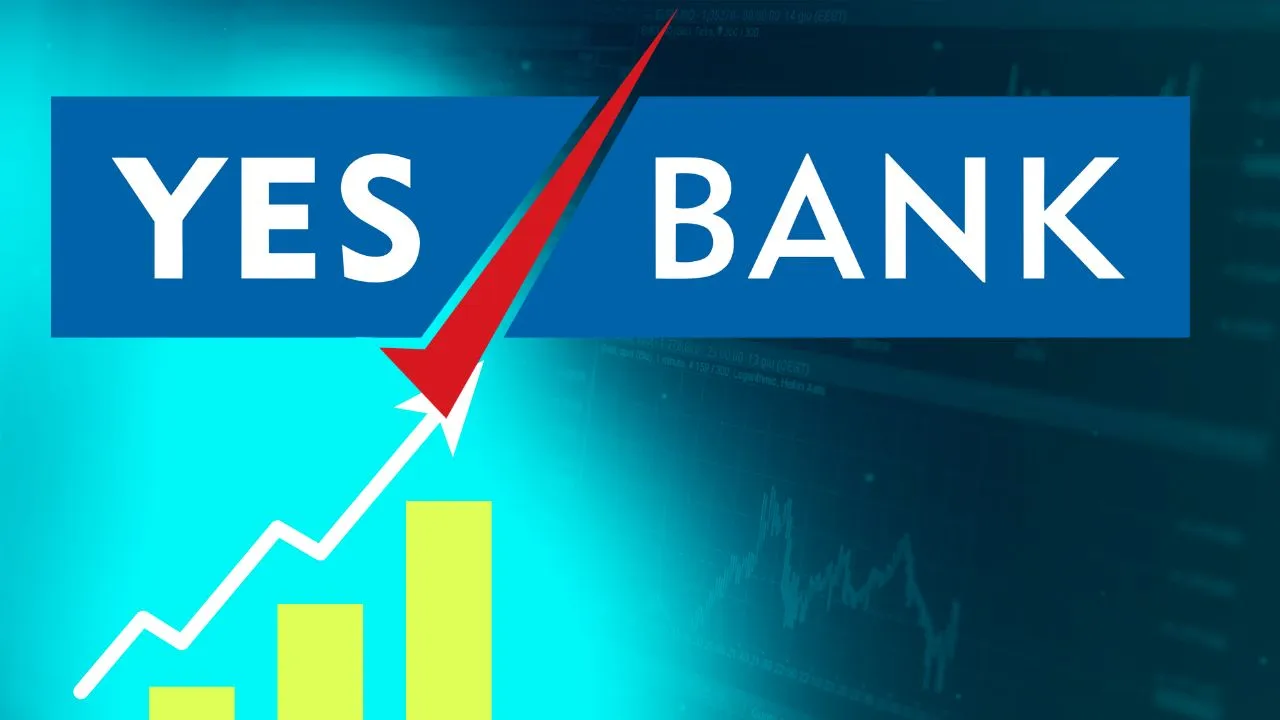Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                   # numerical computations
import pandas as pd                                  # data analyze

import seaborn as sns                                # data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                      # Ignore warnings
warnings.filterwarnings("ignore")

from datetime import datetime                        # To play with datetime object

# install and import sweetviz
import subprocess
batcmd = "pip install sweetviz"
result = subprocess.check_output(batcmd, shell=True)
import sweetviz as sv

from scipy.stats import uniform                      # For hypothesis testing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from statsmodels.stats.outliers_influence import variance_inflation_factor            # to caculate VIF

from sklearn.preprocessing import StandardScaler             # for scaling

from sklearn.model_selection import train_test_split         # train-test-split

# Regression models
from sklearn.linear_model import LinearRegression            # Linear Regression model
from sklearn.linear_model import (Lasso, Ridge,              # regularization model
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from xgboost import XGBRegressor                             # xgboost model
from sklearn.ensemble import RandomForestRegressor           # random forest regressor model

from sklearn.preprocessing import PolynomialFeatures         # polynomial fit
from sklearn.pipeline import Pipeline                        # pipeline

# cross-validation and parameter tunning
from sklearn.model_selection import TimeSeriesSplit          # time-series split for cross-validation
from sklearn.model_selection import cross_val_score          # cross validation
from sklearn.model_selection import GridSearchCV             # grid search for parameter tunning


from sklearn.metrics import (r2_score,                       # evaluation metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

# install and import scikit-plot
batcmd = "pip install scikit-plot==0.3.7"
result = subprocess.check_output(batcmd, shell=True)
import scikitplot as skplt

### Dataset Loading

In [2]:
# Load Dataset
url='https://drive.google.com/file/d/1QE_J9JP9tFgFgzCNOfPt99uaPn08ZpbP/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Date,Open,High,Low,Close


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'Visualizing the missing values')

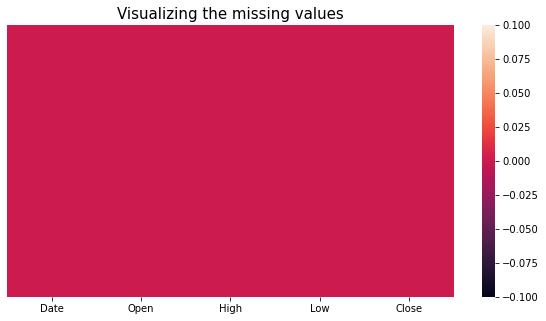

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

*   There are 185 rows and 5 columns in the dataset
*   No duplicate rows.
*   No missing values in the dataset.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

* **Date :** Date of record.

* **Open :** Opening price.

* **High :** Highest price in the month.

* **Low :** Lowest price in the month.

* **Close :** Closing price.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("unique value count in",i,"is",df[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [13]:
# Extract year from date column
df['Year'] = df['Date'].dt.year

In [14]:
# Extract month from date column
df['Month'] = df['Date'].dt.month

In [15]:
# Extract month from date column
df['Quarter'] = df['Date'].dt.quarter

In [16]:
# check unique values for 'Year' column
df['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [17]:
# check unique values for 'Year' column
df['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [18]:
# check unique values for 'Year' column
df['Quarter'].unique()

array([3, 4, 1, 2])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     185 non-null    datetime64[ns]
 1   Open     185 non-null    float64       
 2   High     185 non-null    float64       
 3   Low      185 non-null    float64       
 4   Close    185 non-null    float64       
 5   Year     185 non-null    int64         
 6   Month    185 non-null    int64         
 7   Quarter  185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 11.7 KB


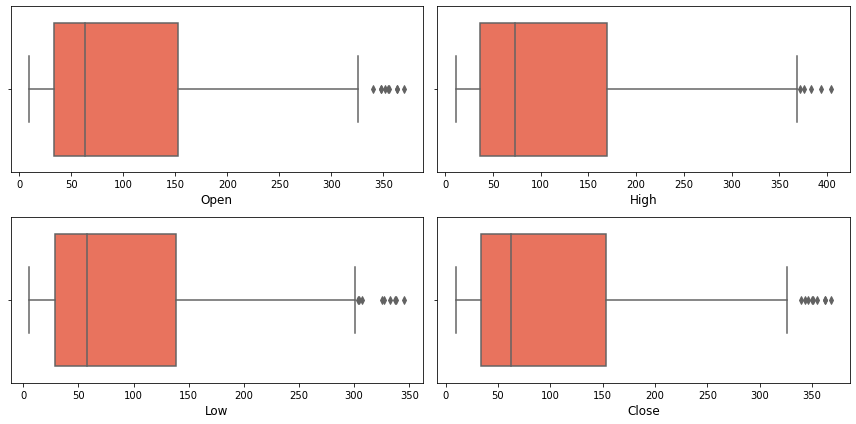

In [20]:
# check for outliers in 'Open' , 'High', 'Low' and 'Close' columns
fig = plt.figure(figsize=(12,6))
c=1
for i in ['Open' , 'High', 'Low', 'Close'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x=i,data=df,color="tomato")
    c = c + 1
plt.tight_layout()

In [21]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [22]:
# find outliers in percentage
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(df[i])
  outliers_percent = round((outliers.size/df[i].size)*100, 2)
  print(f'{i} : {outliers_percent}%')

Open : 4.86%
High : 2.7%
Low : 4.86%
Close : 4.86%


In [23]:
# find outliers
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(df[i])
  print(f'{i} : ')
  print(outliers)

Open : 
145    363.00
146    351.00
147    354.60
151    355.00
154    362.85
155    348.00
156    340.00
157    369.95
158    347.20
Name: Open, dtype: float64
High : 
144    372.00
146    383.25
147    375.75
156    393.35
157    404.00
Name: High, dtype: float64
Low : 
145    337.37
146    345.50
150    307.35
151    304.65
153    303.30
154    325.70
155    327.35
156    332.45
157    338.00
Name: Low, dtype: float64
Close : 
144    361.96
145    351.15
146    350.00
150    354.45
153    362.05
154    346.20
155    339.60
156    367.90
157    343.40
Name: Close, dtype: float64


* all the outliers are from row index 144 to 157

In [24]:
# analyze outliers
df[144:158]

,Date,Open,High,Low,Close,Year,Month,Quarter
144,2017-07-01,293.04,372.00,290.78,361.96,2017,7,3
145,2017-08-01,363.00,368.52,337.37,351.15,2017,8,3
146,2017-09-01,351.00,383.25,345.50,350.00,2017,9,3
147,2017-10-01,354.60,375.75,299.00,314.35,2017,10,4
148,2017-11-01,315.50,329.80,296.00,306.80,2017,11,4
149,2017-12-01,307.20,319.00,300.65,315.05,2017,12,4
150,2018-01-01,314.00,366.00,307.35,354.45,2018,1,1
151,2018-02-01,355.00,366.50,304.65,322.25,2018,2,1
152,2018-03-01,320.70,325.80,285.10,304.90,2018,3,1
153,2018-04-01,305.00,368.75,303.30,362.05,2018,4,2


-----observation-----
* From the above boxplots it seems like there are some outliers in the dataset.
* But when we calculated the percentage we found that one 'High' column has more than 2.5 percent and all the other 3 columns have almost same which is 4.86 percent outliers and we can't consider more than 2 and 4 perecent of data as outliers blindly.
* We know that these are stock prices, and all the outliers in all 4 columns are almost similar which is more than 300.
* From all the above points we can say that these are not outliers , these are possible values. 
* and we also cross checked the prices on google of 'Yes Bank stock' in 2017 and 2018 as the outliers data belongs to these years.

In [25]:
# check min, max and mean prices for each year 
df.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                        High                         Low          \
         min     max        mean     min     max        mean     min     max   
Year                                                                           
2005   12.58   13.49   13.183333   13.88   14.88   14.423333   11.25   13.00   
2006   13.68   25.40   18.401667   16.97   29.66   21.090833   13.40   24.40   
2007   27.00   46.40   35.160833   31.58   54.00   39.743333   23.31   45.00   
2008   12.40   50.88   31.292500   16.56   55.56   34.330833   11.01   44.40   
2009   10.00   50.98   26.940833   11.24   55.67   32.678333    8.16   48.60   
2010   47.80   72.20   57.946667   51.48   77.60   63.508333   44.60   68.21   
2011   51.84   63.00   58.865000   57.69   68.26   63.341667   46.71   61.36   
2012   47.92   89.20   70.648333   66.50   95.00   77.577500   46.11   88.01   
2013   49.20  104.41   82.608333   67.81  109.43   92.748333   43.22   97.20   
2014   60.52  142.08  100.463333   62.70  155.00  112.439167   58.42  134.00   
2015  135.61  177.00  161.141667  154.52  182.00  169.394167  118.00  158.90   
2016  138.80  273.30  207.124167  149.90  290.00  224.225833  126.45  245.80   
2017  231.98  363.00  309.131667  284.31  383.25  333.800833  226.30  345.50   
2018  174.00  369.95  300.725000  194.30  404.00  331.920833  147.00  338.00   
2019   42.00  277.00  137.000000   70.50  285.90  155.858333   29.05  228.80   
2020   12.00   46.90   25.150909   14.01   87.95   32.805455    5.55   36.55   

                   Close                      
            mean     min     max        mean  
Year                                          
2005   12.391667   12.46   13.71   13.215000  
2006   16.903333   15.33   26.97   19.350000  
2007   31.830000   28.14   49.81   36.873333  
2008   23.335000   12.26   50.54   28.252500  
2009   24.275833    9.98   53.41   30.032500  
2010   53.880833   47.32   71.86   58.645833  
2011   52.275833   47.72   62.90   57.223333  
2012   67.428333   65.97   92.84   74.281667  
2013   72.990833   48.65  104.41   80.585000  
2014   94.627500   60.95  154.57  106.947500  
2015  146.293333  137.90  176.52  160.112500  
2016  193.472500  137.67  272.56  213.524167  
2017  292.530833  279.10  361.96  315.306667  
2018  263.820833  169.65  367.90  288.637500  
2019  106.687500   41.45  275.05  125.262500  
2020   18.797273   11.95   39.20   22.105455

In [26]:
# check min, max and mean prices for each Month 
df.groupby('Month').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
         min     max        mean    min     max        mean    min     max   
Month                                                                        
1      13.68  314.00  100.928000  17.16  366.00  117.346667  11.48  307.35   
2      12.19  355.00  109.134667  12.50  366.50  116.035333   9.90  304.65   
3      10.00  320.70  108.150667  11.24  325.80  123.670667   5.55  285.10   
4      10.04  309.60  113.044000  17.51  368.75  125.709333   9.94  303.30   
5      15.94  362.85  114.589333  21.80  364.40  122.090000  14.76  325.70   
6      18.20  348.00  113.268000  18.40  350.10  118.471333  13.40  327.35   
7      13.00  340.00  103.891250  14.00  393.35  117.493750  11.10  332.45   
8      12.00  369.95  108.481875  14.88  404.00  116.064375  11.85  338.00   
9      13.48  351.00  103.691875  14.87  383.25  114.283750  12.27  345.50   
10     13.20  354.60   93.815625  14.01  375.75  109.928125  11.01  299.00   
11     12.41  315.50   97.975000  13.88  329.80  105.645000  11.25  296.00   
12     12.40  307.20  100.850000  14.44  319.00  107.654000  11.13  300.65   

                   Close                      
             mean    min     max        mean  
Month                                         
1       93.766000  12.24  354.45  108.774667  
2       98.238667  10.26  322.25  107.760667  
3       98.524000   9.98  309.82  113.014000  
4      102.284667  15.45  362.05  114.450000  
5      102.404667  18.03  346.20  112.874667  
6      102.642000  15.62  339.60  109.661333  
7       96.206250  11.95  367.90  108.322500  
8       95.777500  13.42  351.15  103.386875  
9       85.735625  13.15  350.00   93.343750  
10      85.361875  12.42  314.35   97.399375  
11      87.251875  12.26  306.80   94.671250  
12      92.808000  13.71  315.05  100.724000

In [27]:
# check min, max and mean prices for each Quarter 
df.groupby('Quarter').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})

Open                       High                        Low          \
           min     max        mean    min     max        mean    min     max   
Quarter                                                                        
1        10.00  355.00  106.071111  11.24  366.50  119.017556   5.55  307.35   
2        10.04  362.85  113.633778  17.51  368.75  122.090222   9.94  327.35   
3        12.00  369.95  105.355000  14.00  404.00  115.947292  11.10  345.50   
4        12.40  354.60   97.476596  13.88  375.75  107.744255  11.01  300.65   

                     Close                      
               mean    min     max        mean  
Quarter                                         
1         96.842889   9.98  354.45  109.849778  
2        102.443778  15.45  362.05  112.328667  
3         92.573125  11.95  367.90  101.684375  
4         88.381702  12.26  315.05   97.531702

### What all manipulations have you done and insights you found?

* we have converted the string object to date for date column.
* we have extracted the year from **'Date'** and created a seprate **'Year'** column.
* Also created **'Month'** and **'Quarter'** variable from date.
* checked for **outliers** and found out there is no outlier in the dataset.
* And also there is no Null values.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

                                             |          | [  0%]   00:00 -> (? left)


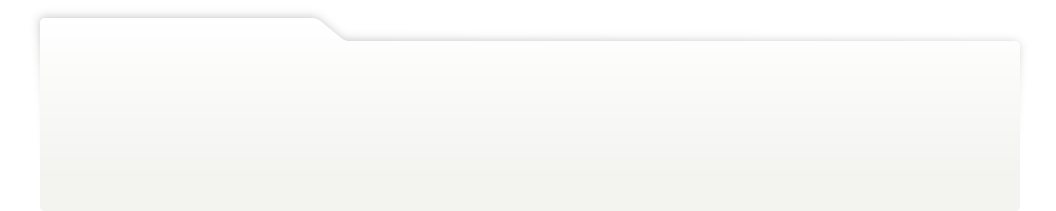
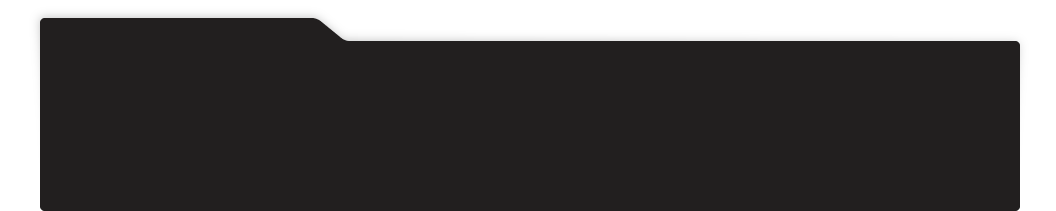
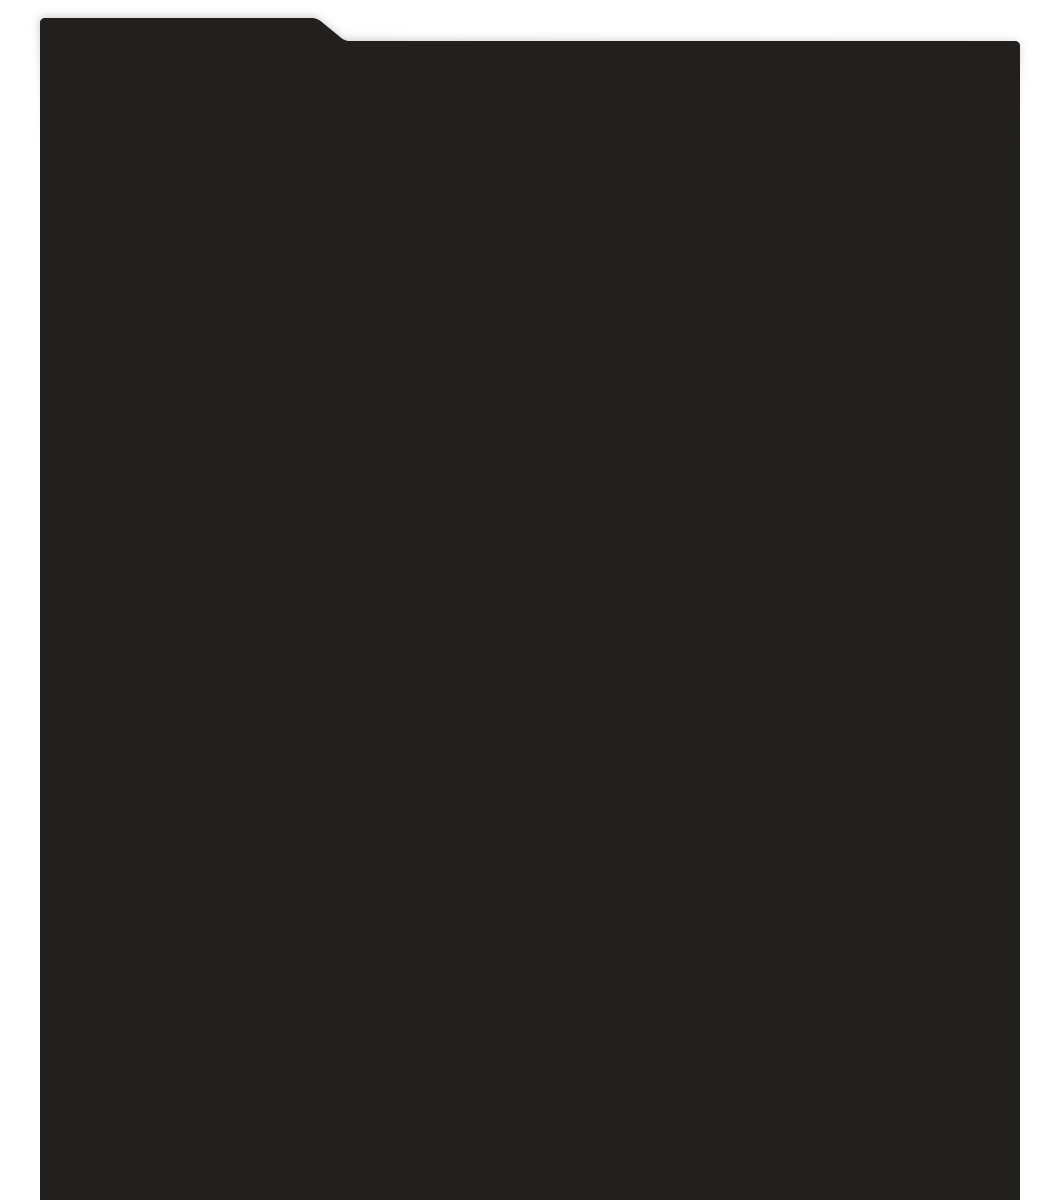
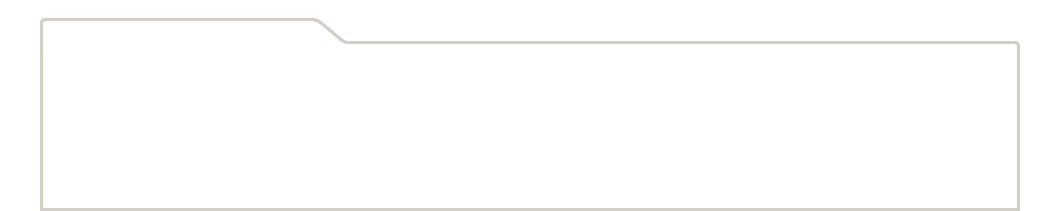
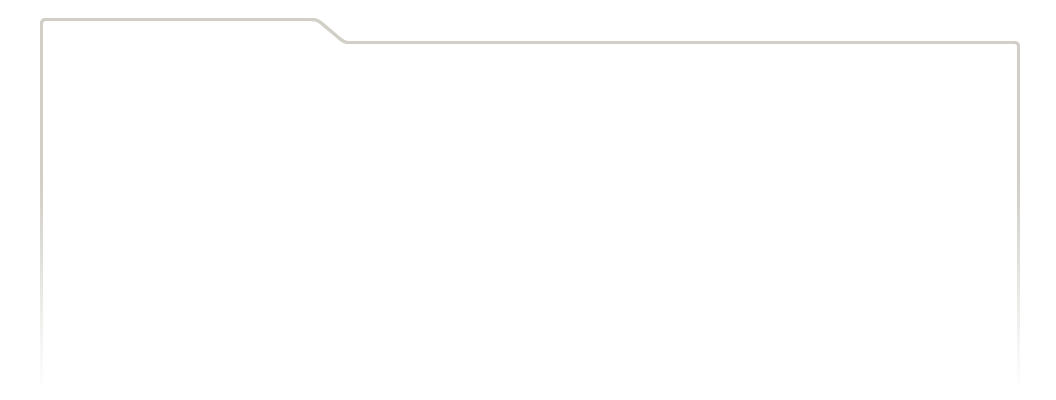
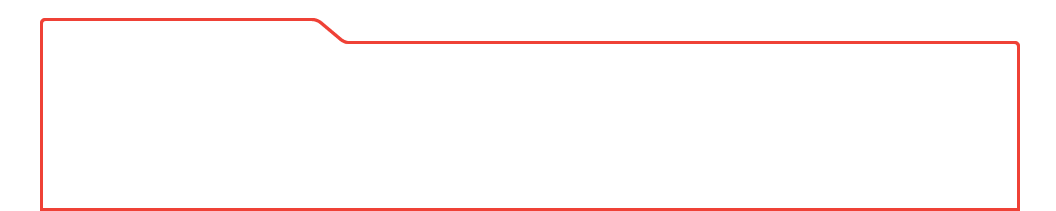
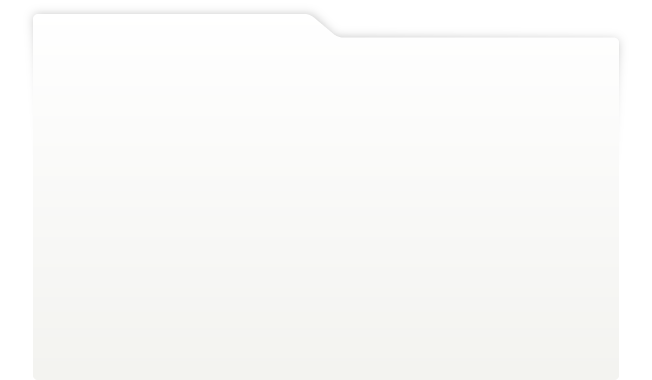
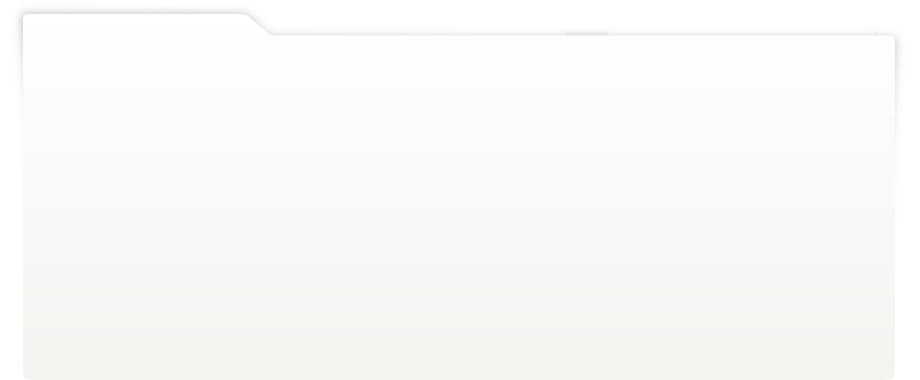
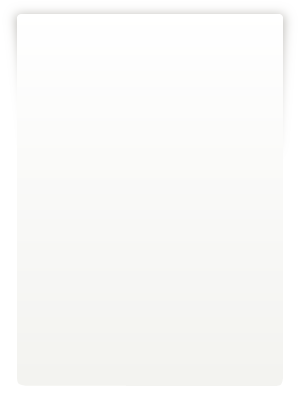
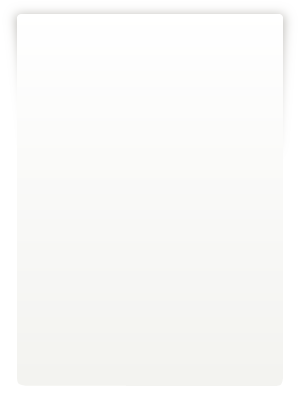
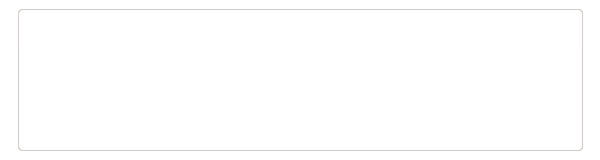
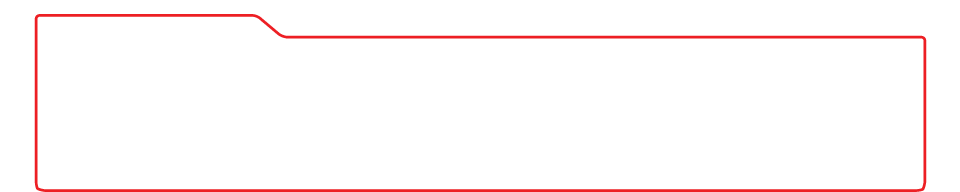
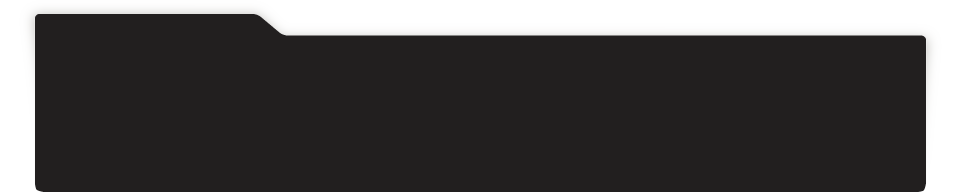
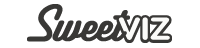
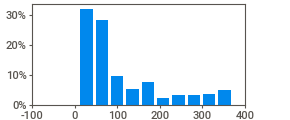
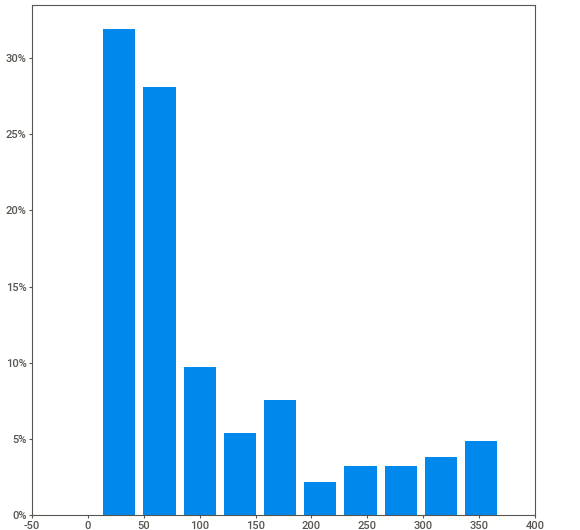
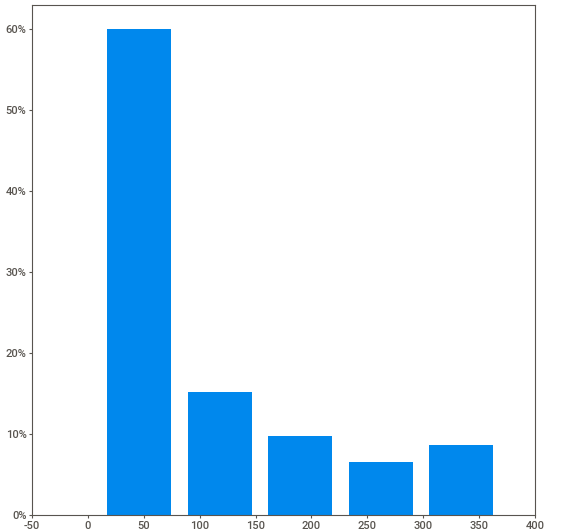
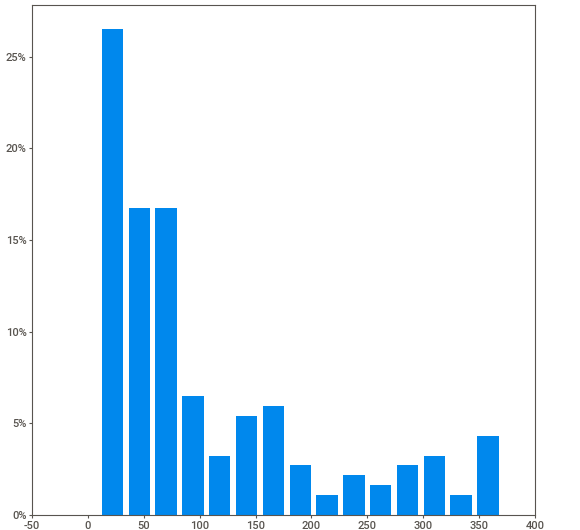
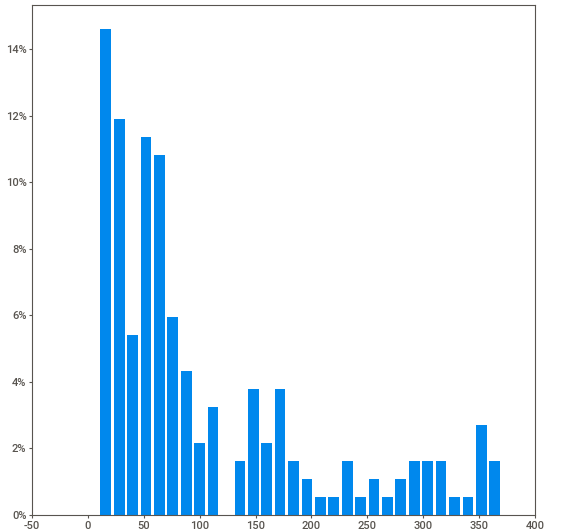
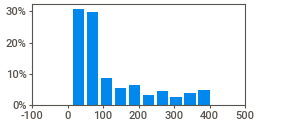
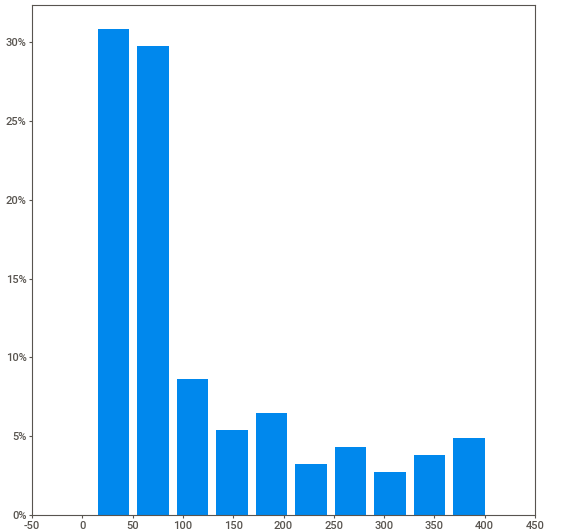
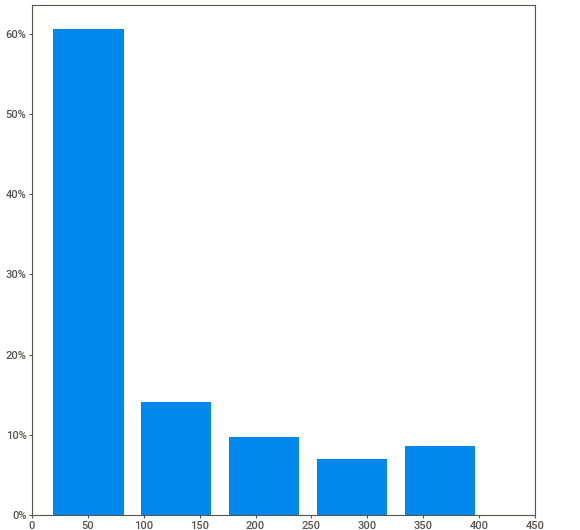
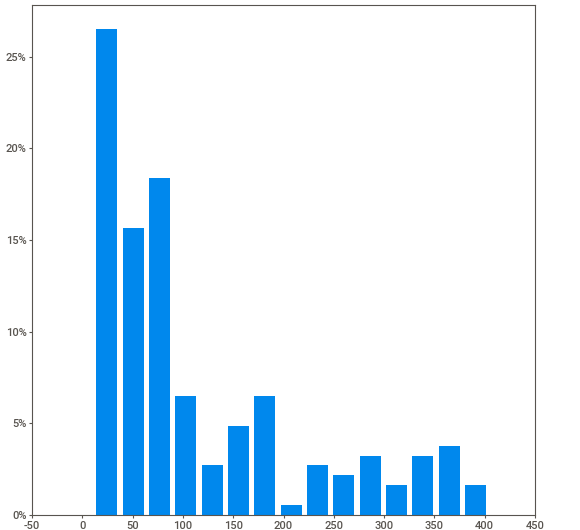
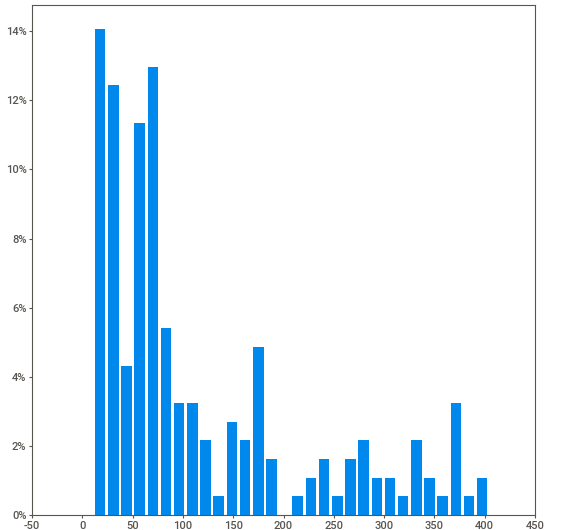
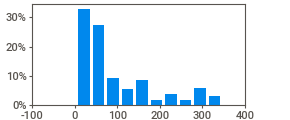
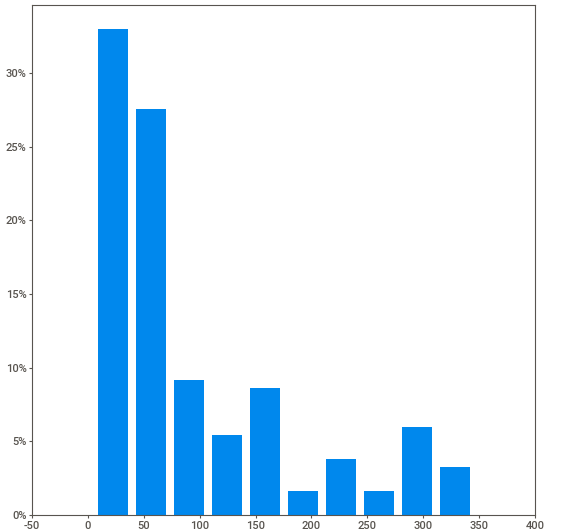
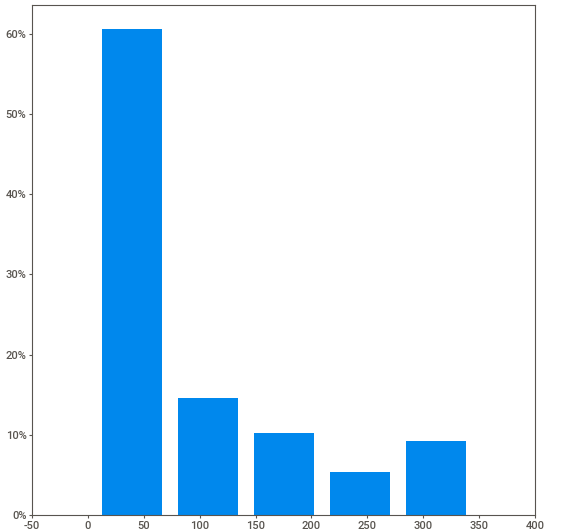
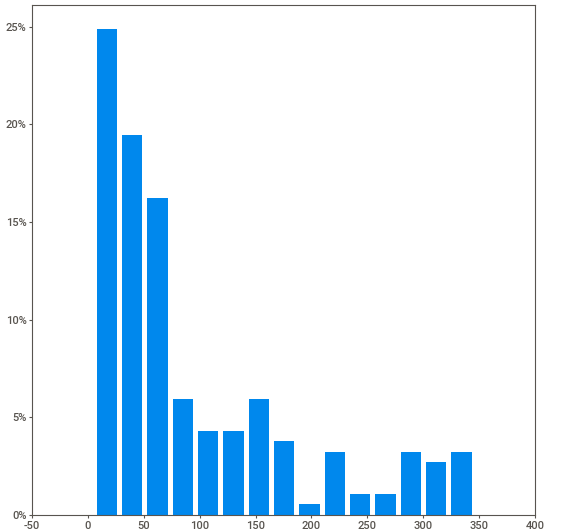
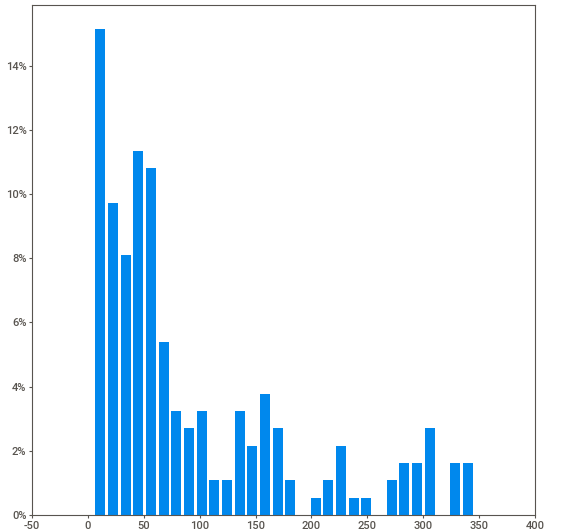
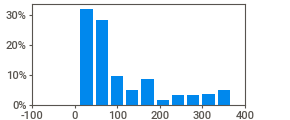
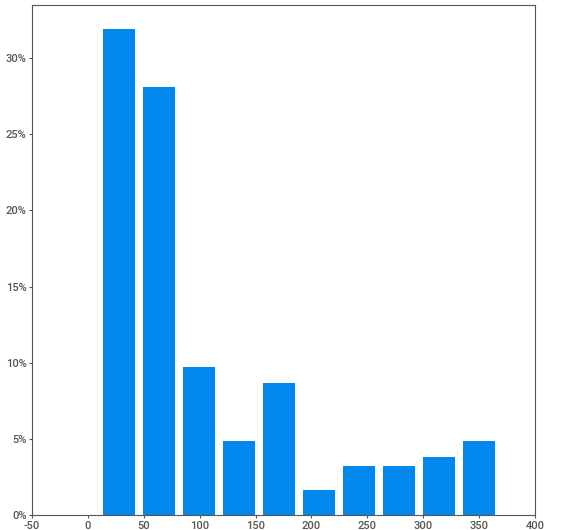
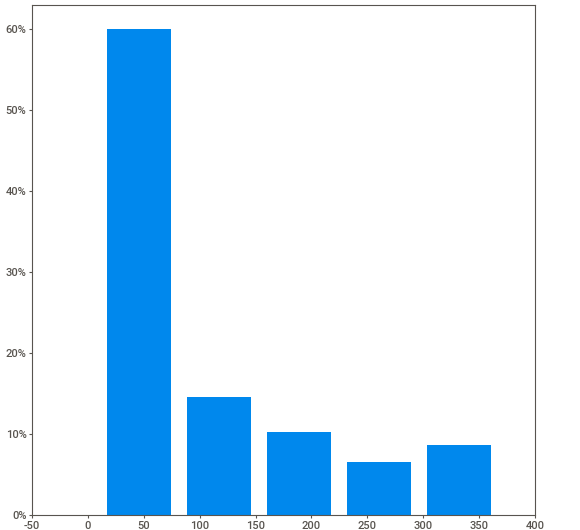
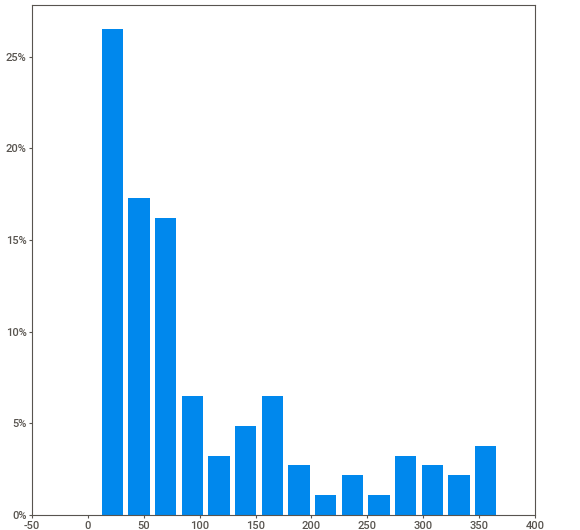
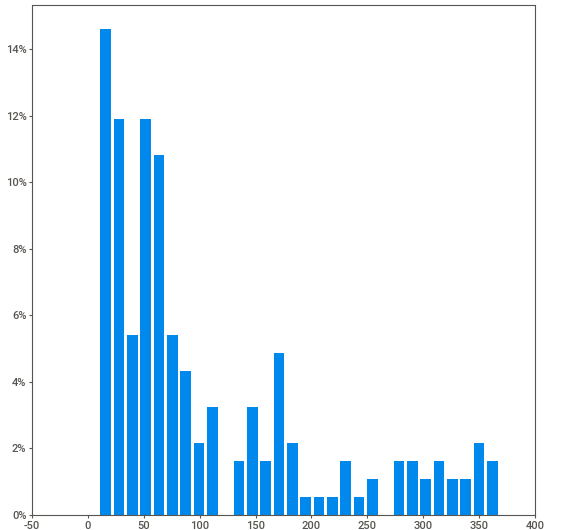
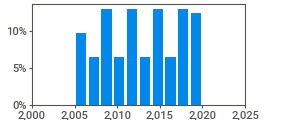
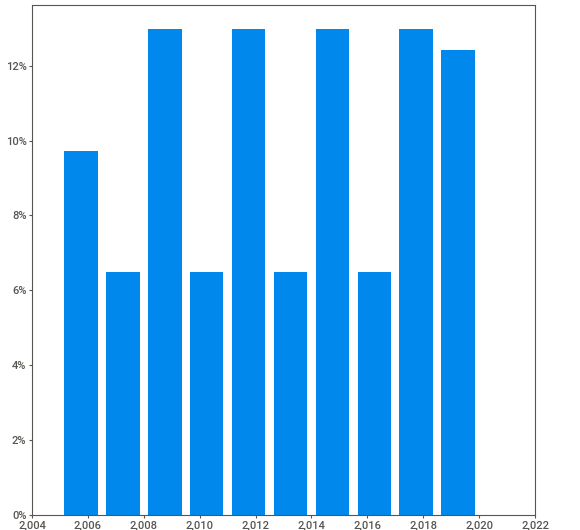
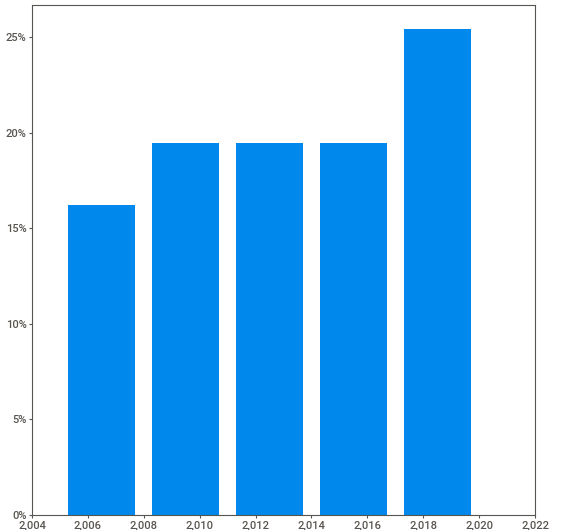
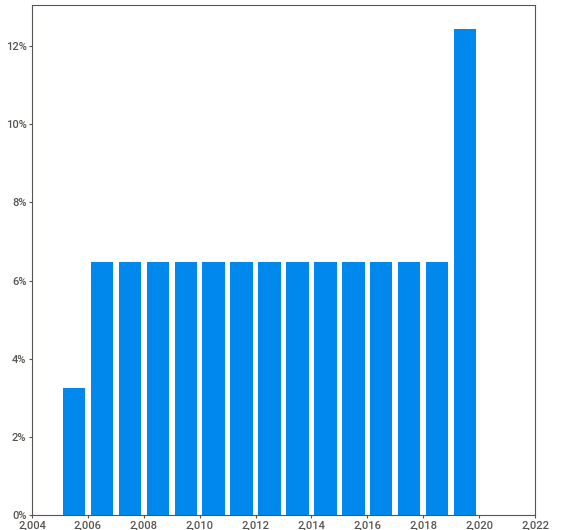
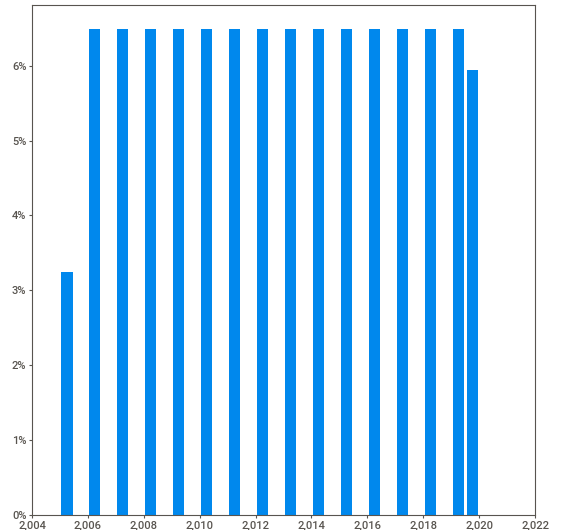
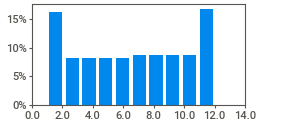
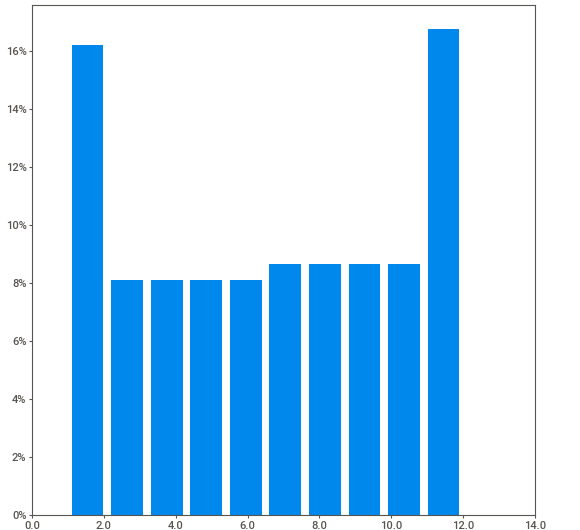
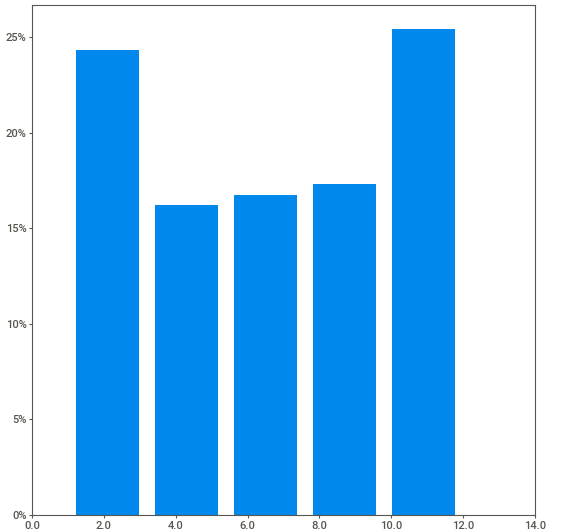
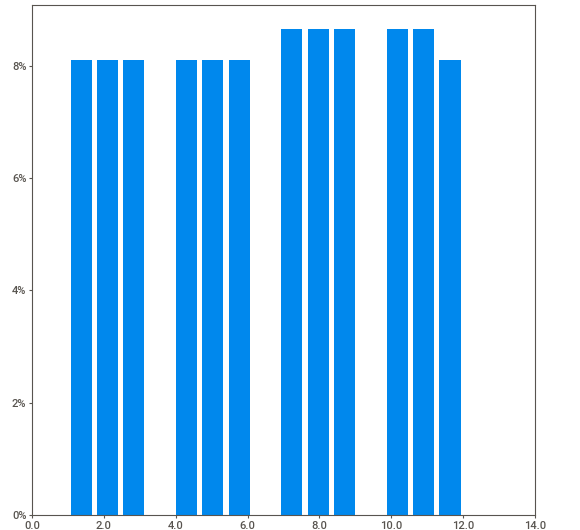
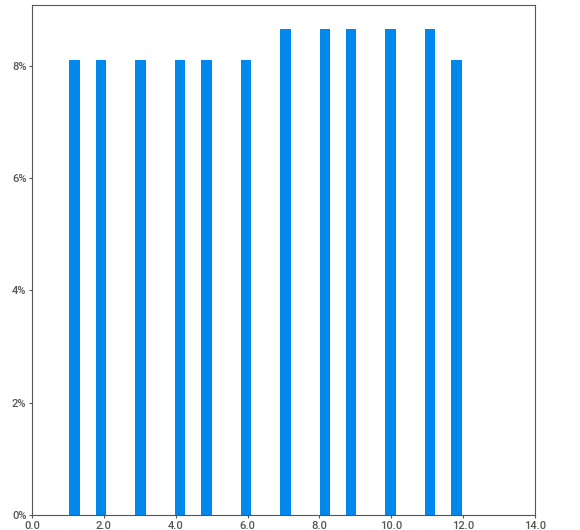
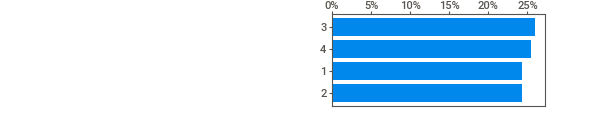
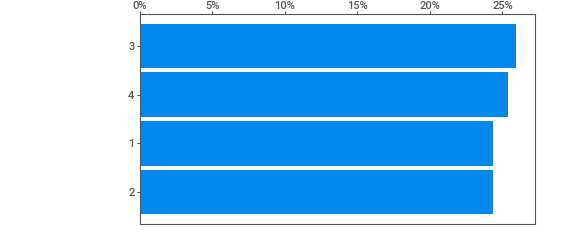
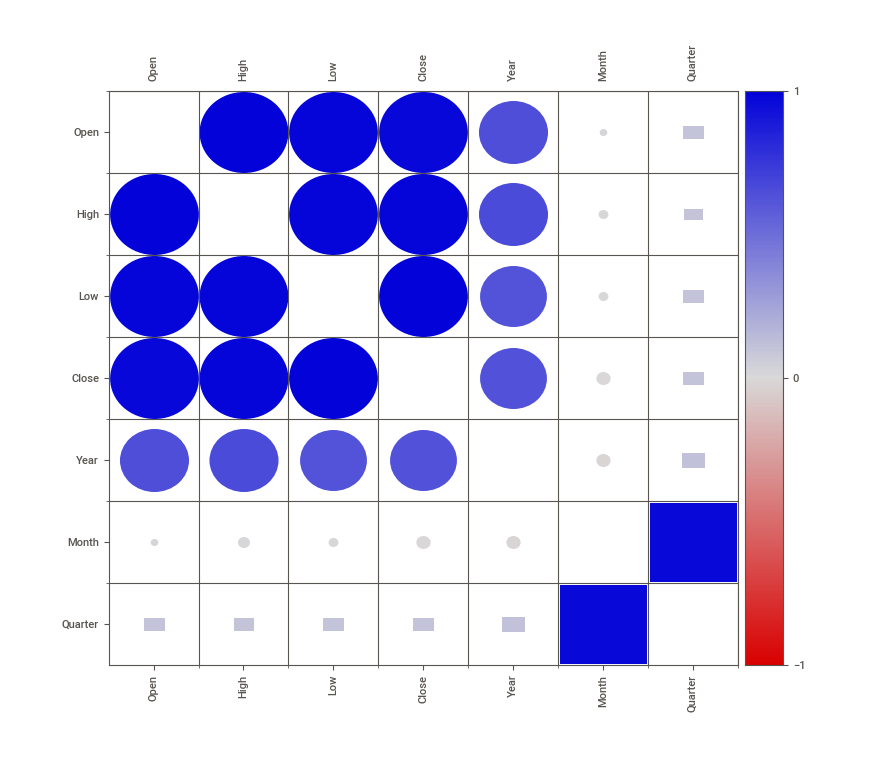
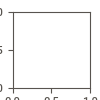

In [28]:
# getting a overview of data by Sweetviz analyze
sv.analyze(df).show_notebook()

#### Chart - 1

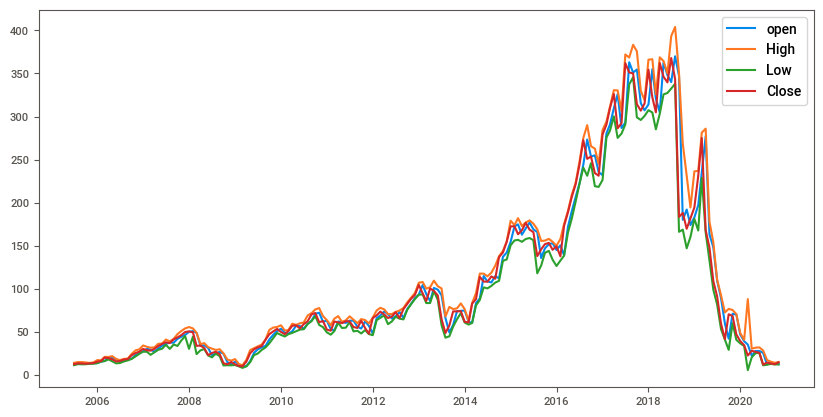

In [29]:
#  visualizing price trend since 2005 to 2020
plt.figure(figsize = (10,5))
plt.plot(df['Date'] , df['Open'] , label = 'open')
plt.plot(df['Date'] , df['High'] , label = 'High')
plt.plot(df['Date'] , df['Low'], label = 'Low')
plt.plot(df['Date'] , df['Close'], label = 'Close')
plt.legend()

##### 1. Why did you pick the specific chart?

Line chart is good for visualizing price trends over time series data.

##### 2. What is/are the insight(s) found from the chart?

* Stock price is increasing till 2018.
* After 2018 price is decreased at very high rate.
* We can say something happened in 2018 which impected the stock price negatively. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As it also mentioned in problem statement that some fraud case happened in 2018, which impected the business very negatively, which we can also see in above line chart.

#### Chart - 2

Text(0.5, 74.72222222222221, 'Min-Max-Mean')

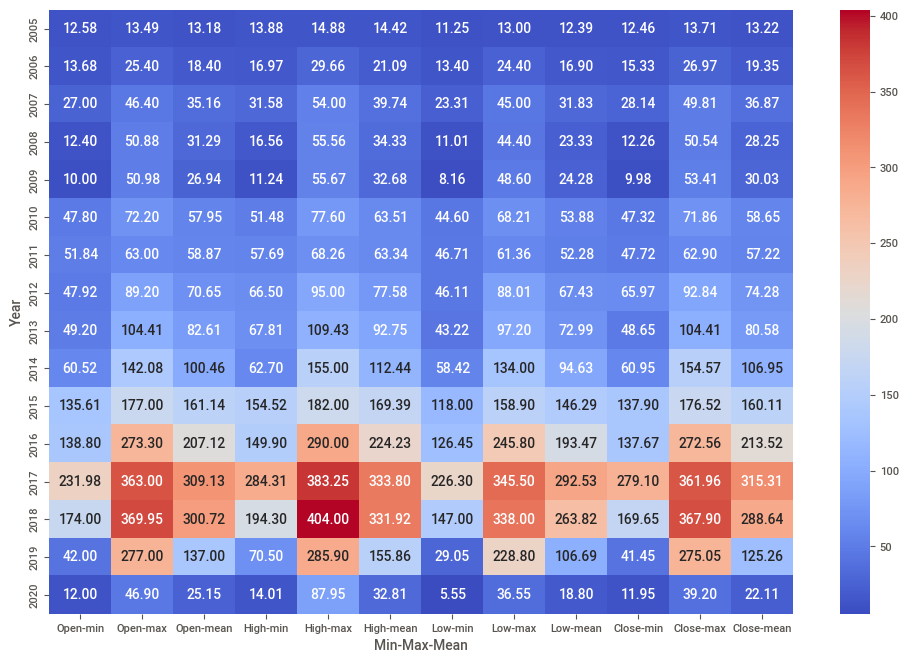

In [30]:
# Visualizing min, max and mean prices for each year 
Year_prices_df = df.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})
plt.figure(figsize = (12,8))
sns.heatmap(Year_prices_df , annot = True, cmap = 'coolwarm', fmt='.2f')
plt.xlabel('Min-Max-Mean')

##### 1. Why did you pick the specific chart?

Heatmap is best at visulaizing low and high values , where value is low , where it is high, where it is little low, where it is little high, where it is median something like this.

##### 2. What is/are the insight(s) found from the chart?

* All time high was 404, it was in 2018.
* All time low was 5.55, it was in 2020.
* Here also we can price drop after 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

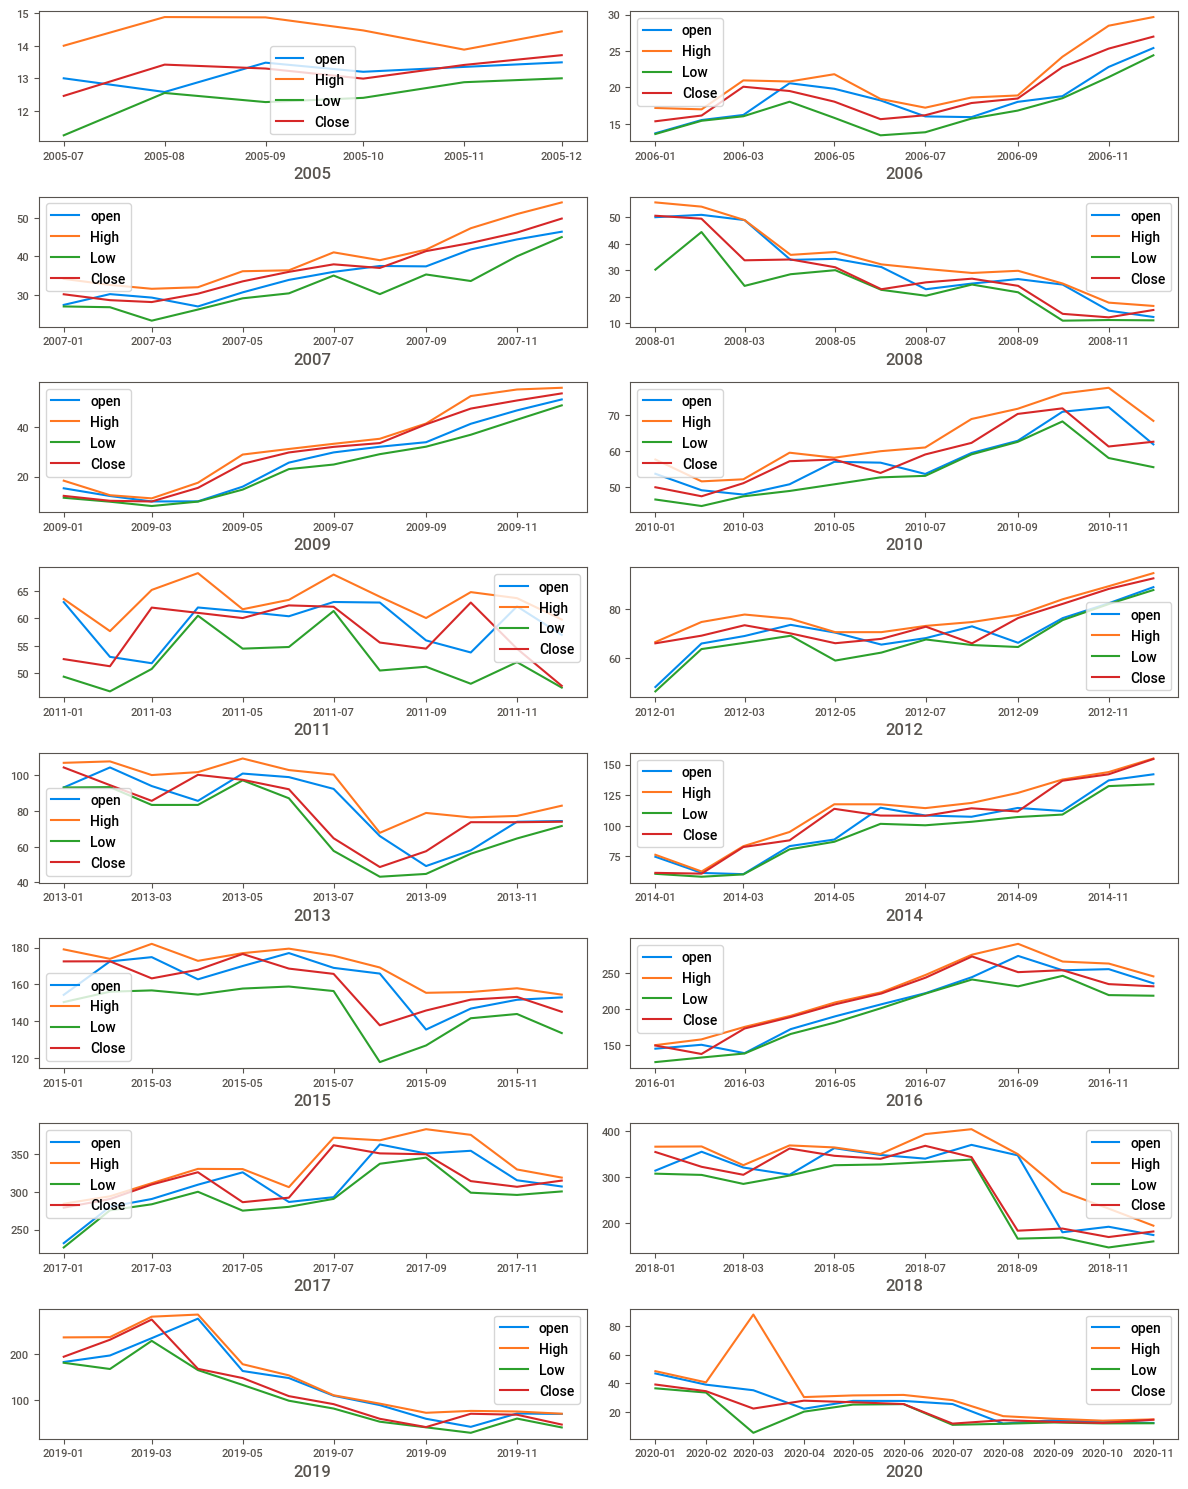

In [31]:
# Visualizing price trends of each year separately
fig = plt.figure(figsize=(12,15))
c=1
for i in df['Year'].unique() :
    plt.subplot(8, 2, c)
    plt.xlabel(i, fontsize = 12)
    plt.plot(df['Date'][df['Year'] == i] , df['Open'][df['Year'] == i] , label = 'open')
    plt.plot(df['Date'][df['Year'] == i] , df['High'][df['Year'] == i] , label = 'High')
    plt.plot(df['Date'][df['Year'] == i] , df['Low'][df['Year'] == i], label = 'Low')
    plt.plot(df['Date'][df['Year'] == i] , df['Close'][df['Year'] == i], label = 'Close')
    plt.legend()
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To visualize price trends of each year separately.

##### 2. What is/are the insight(s) found from the chart?

* In most of the year price is increasing or stable from start to end.
* Except in 2008, price is going down.
* From 2016 to 2018, price is increased at high rate.
* In 2018, price is going up till august, then it decreased at very high rate.
* In 2019 and 2020 also, price is continuously decreasing.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, it will help creating a positive business impact as stock price is increased at high rate in 2016 to 2018. They should implement the stragies, planning used in 2016 to 2018.
* After 2018 price decreased very fast, we can say it may because of Rana kapoor fraud case, They should not let this type incident happens in future.  

#### Chart - 4

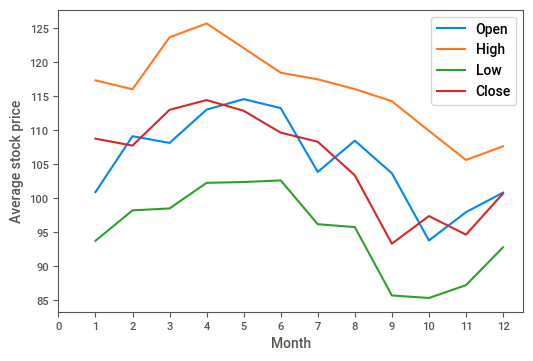

In [32]:
# Visualizing Open, High, Low and Close average price trends over months
df.groupby('Month').aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'}).plot()
plt.xticks(np.arange(13))
plt.ylabel('Average stock price')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize average price trends over months, and line charts are good at visualizing price trends.

##### 2. What is/are the insight(s) found from the chart?

* stock price is relatively going down in september and october.
* Stock price is high in march and april.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* 

#### Chart - 5

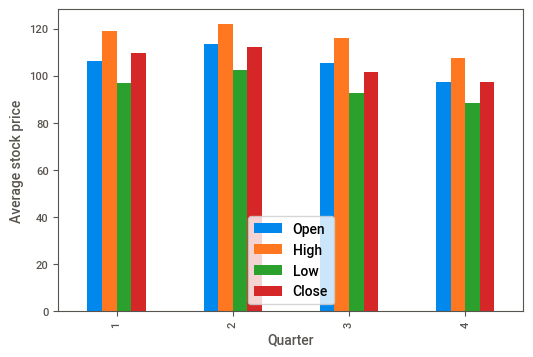

In [33]:
# Visualizing Open, High, Low and Close average price trends over Quarter
df.groupby('Quarter').aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'}).plot.bar()
plt.ylabel('Average stock price')
plt.show()

##### 1. Why did you pick the specific chart?

Beacause we have only 4 xticks here, so the bar plot is batter than line chart here. 

##### 2. What is/are the insight(s) found from the chart?

* Stock price is slightly low in last quarter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

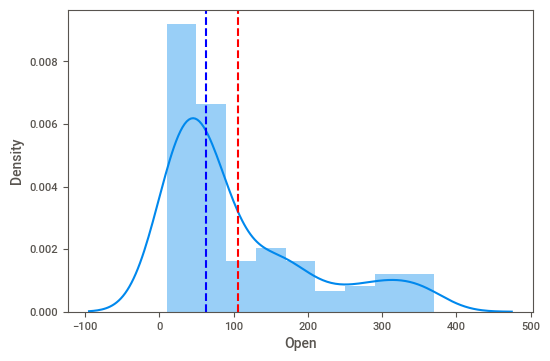

In [34]:
# check distribution of 'Open' variable
sns.distplot(df['Open'])
plt.axvline(np.mean(df['Open']),color='r', linestyle='--')
plt.axvline(np.median(df['Open']),color='b', linestyle='--')

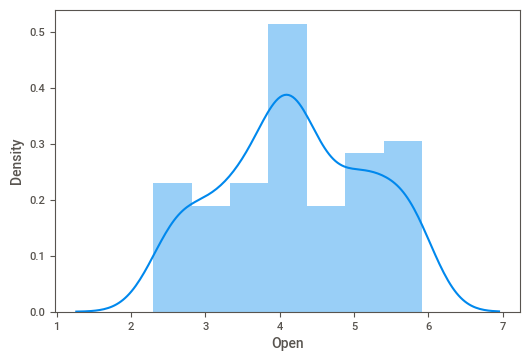

In [35]:
# apply log transformation it has right skewed distribution
sns.distplot(np.log(df['Open']))

##### 1. Why did you pick the specific chart?

To check Distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

* Positively Skewed Distribution
* After applying Log transformation it become close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

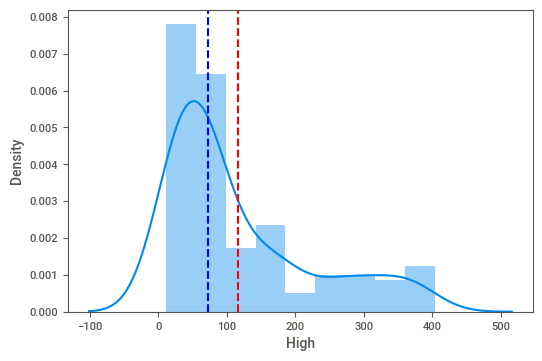

In [36]:
# check distribution of 'High' variable
sns.distplot(df['High'])
plt.axvline(np.mean(df['High']),color='r', linestyle='--')
plt.axvline(np.median(df['High']),color='b', linestyle='--')

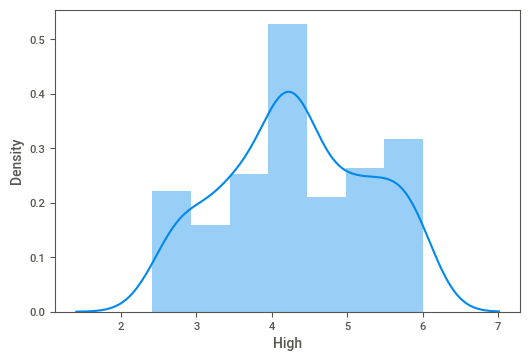

In [37]:
# apply log transformation it has right skewed distribution
sns.distplot(np.log(df['High']))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

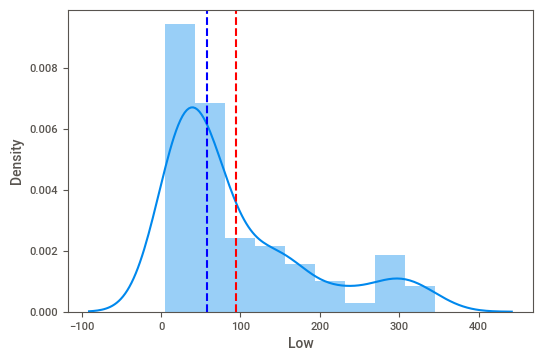

In [38]:
# check distribution of 'Low' variable
sns.distplot(df['Low'])
plt.axvline(np.mean(df['Low']),color='r', linestyle='--')
plt.axvline(np.median(df['Low']),color='b', linestyle='--')

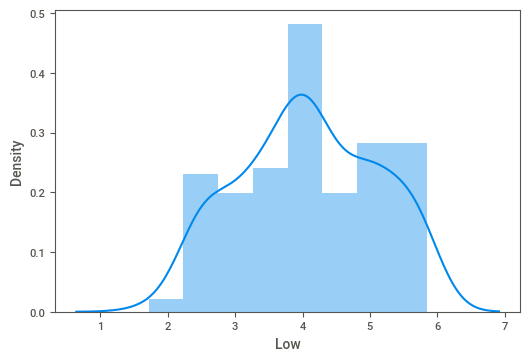

In [39]:
# apply log transformation
sns.distplot(np.log(df['Low']))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

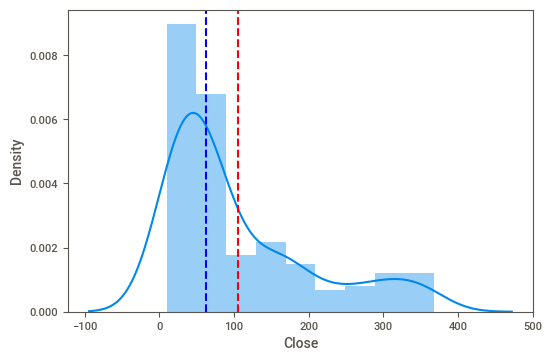

In [40]:
# check distribution of 'Close' variable
sns.distplot(df['Close'])
plt.axvline(np.mean(df['Close']),color='r', linestyle='--')
plt.axvline(np.median(df['Close']),color='b', linestyle='--')

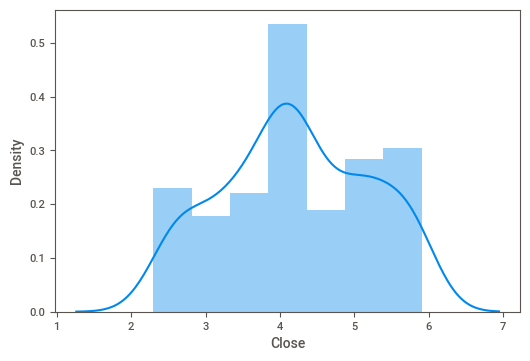

In [41]:
# apply log transformation
sns.distplot(np.log(df['Close']))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

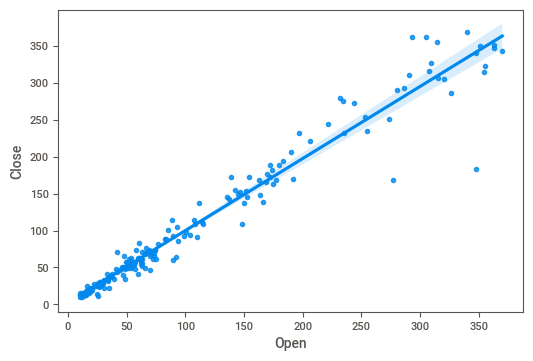

In [42]:
# reg plot to check the relation between 'Open' and the dependent variable 'Close'
sns.regplot(df['Open'], df['Close'])

##### 1. Why did you pick the specific chart?

Regplot is very good at visualizing linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

* strong linear pattern

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

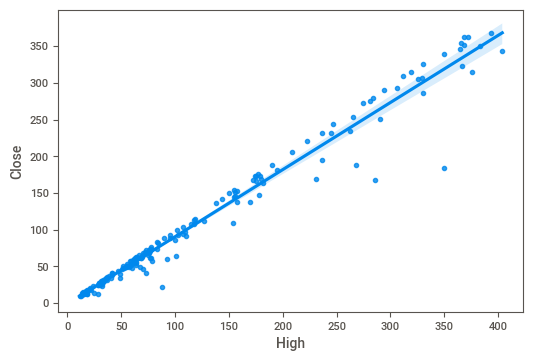

In [43]:
# reg plot to check the relation between 'High' and the dependent variable 'Close'
sns.regplot(df['High'], df['Close'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* strong linear pattern

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

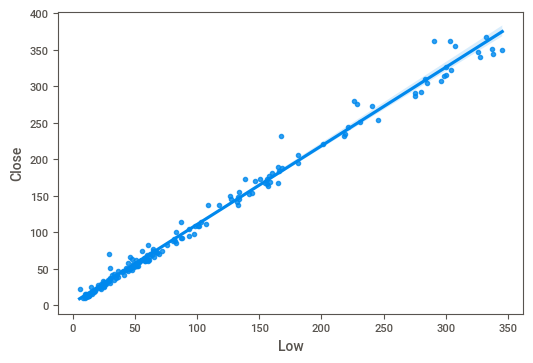

In [44]:
# reg plot to check the relation between 'Low' and the dependent variable 'Close'
sns.regplot(df['Low'], df['Close'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* strong Linear pattern


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

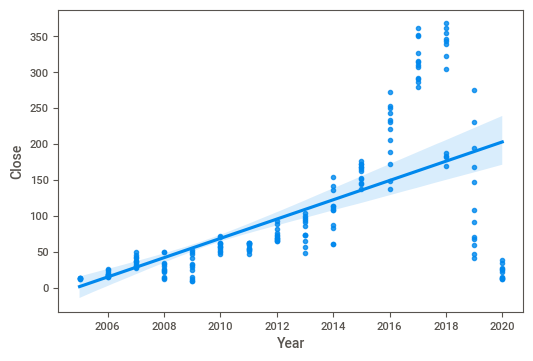

In [45]:
# reg plot to check the relation between 'Year' and the dependent variable 'Close'
sns.regplot(df['Year'], df['Close'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Price is going up with year, unless something unusual hppens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Polynomial fit can help here.

#### Chart - 14 - Correlation Heatmap

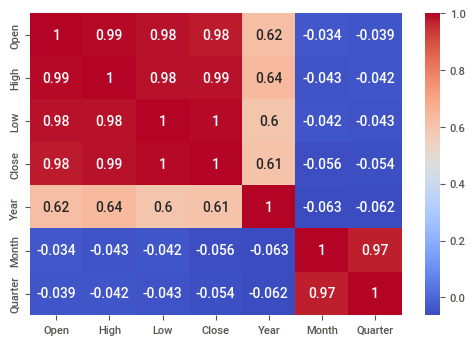

In [46]:
# Correlation Heatmap visualization
sns.heatmap(df.corr() , annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

heatmap is good visualizing corellation between variables.

##### 2. What is/are the insight(s) found from the chart?

* Clossing price has very strong corellation with open, high and low variable.
* Clossing price has low corellation with year, month and quarter as compared to other variables.
* we also have problem of multicollinearity here as independent variables also have strong co-relation with eachother.


#### Chart - 15 - Pair Plot 

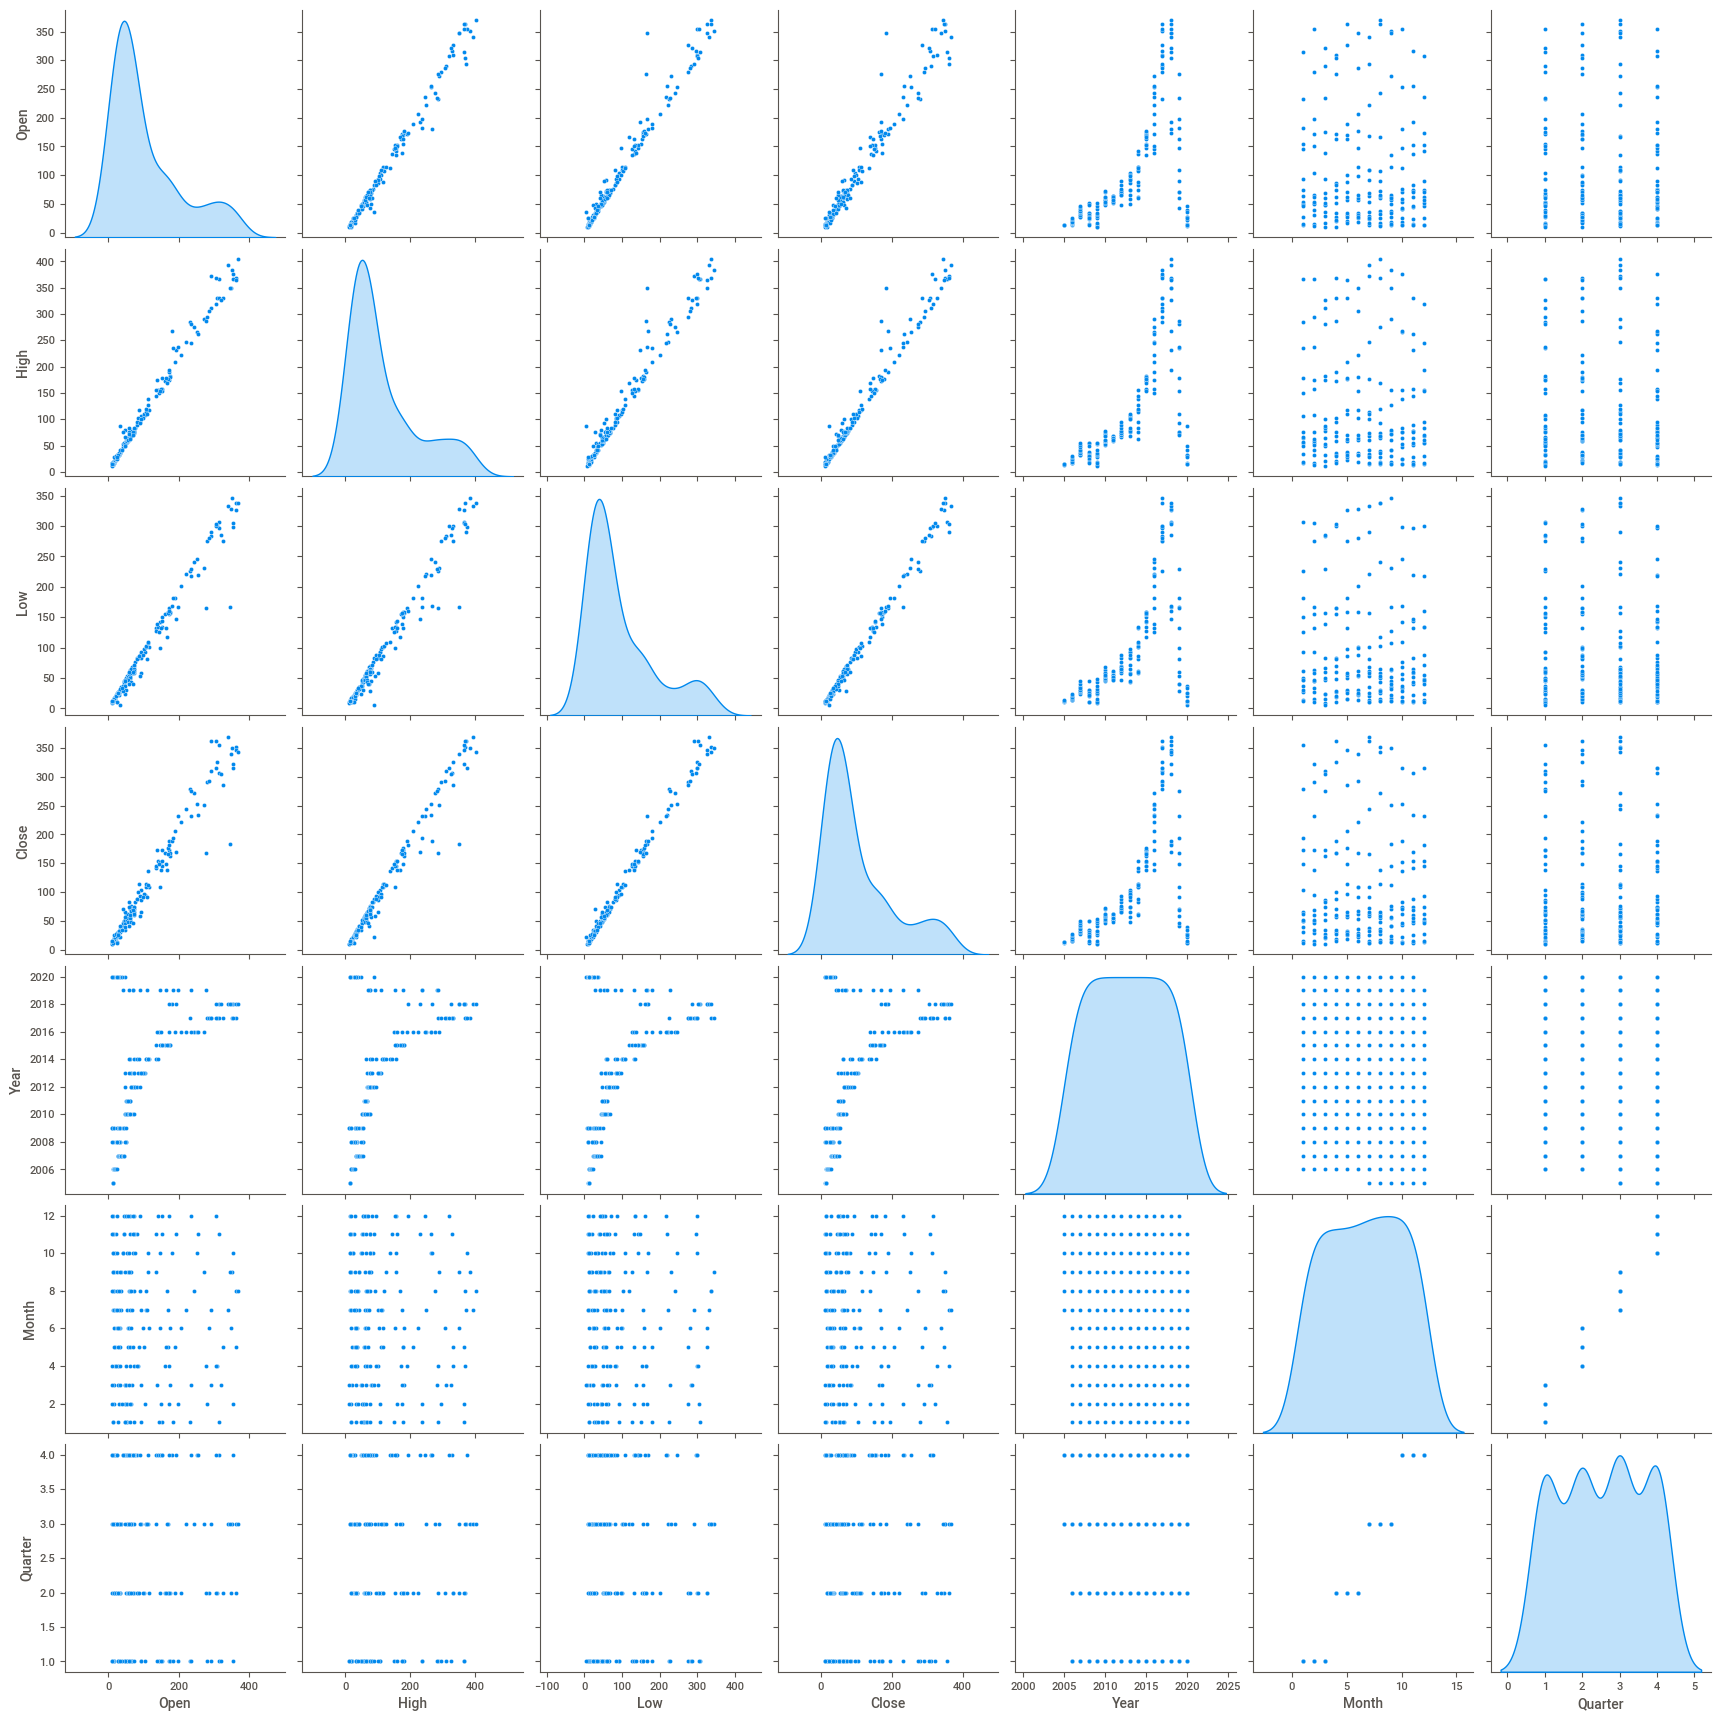

In [47]:
# Pair Plot visualization
sns.pairplot(df , diag_kind = 'kde')

##### 1. Why did you pick the specific chart?

* Pair plot is good as visualising scatter plot and distribution together.
* pair plot also good at showing realtion variables with scatter plot.
* I used pair plot to analyse the patterns of data and realationship between the features. 
* It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

* Open , high, low and close variables has skewed diatribution.
* Open , high, low and close variables are showing strong linear pattern with eachother.

-----

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1. Average Closing stock price is more than 100.
2. Average Closing stock price is equals to average Opening stock Price.
3. Average closing stock price in 2018 is more than to 300.



### Hypothetical Statement - 1

Average Closing stock price is more than 100.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0      : μ = 100

Alternate hypothesis H1 : μ > 100

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
mean = 100
sample_mean = np.mean(df['Close'])         # mean
sample_size = df['Close'].size             # sample size
std = np.std(df['Close'])                  # standard deviation

# z-test
z_value = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - norm.cdf(z_value)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Failed to reject the Null Hypothesis as p-value = 0.23575048075613925.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis.

##### Why did you choose the specific statistical test?

Answer Here:

* Because sample sizes are large enough, more than 30.

-----

### Hypothetical Statement - 2

Average Closing stock price is equals to average Opening stock Price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0      : μ1 = μ2

Alternate hypothesis H1 : μ1 ≠ μ2

Test type : Two Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
open_mean = np.mean(df['Open'])              # mean     
close_mean = np.mean(df['Close'])

open_size = df['Close'].size                 # sample size
close_size = df['Close'].size

open_var = np.var(df['Open'])                # Variance
close_var = np.var(df['Close'])                  

# z-test
z_value = (open_mean - close_mean) / np.sqrt((open_var/open_size) + (close_var/close_size))

# calculate p-value
p_value = norm.cdf(z_value)  

# Two tailed test
if p_value < 0.5:
  p_value = p_value * 2         
else:
  p_value = (1 - p_value)*2 

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Failed to reject the Null Hypothesis as p-value = 0.9737638583014707.


##### Which statistical test have you done to obtain P-Value?


I have used two sample Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis. so, we can conclude that average Closing stock price is equal to average Opening stock Price.

##### Why did you choose the specific statistical test?

Answer Here.

* Because sample sizes are large enough, more than 30.

-----

### Hypothetical Statement - 3

Average closing stock price in 2018 is more than to 300.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 300

Alternate hypothesis H1 : μ > 300

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
mean = 100
sample_mean = np.mean(df['Close'][df['Year'] == 2018])         # mean
sample_size = df['Close'][df['Year'] == 2018].size             # sample size
std = np.std(df['Close'][df['Year'] == 2018])                  # standard deviation

# t-test
t_statistic = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - t.cdf(t_statistic, sample_size-1)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Null Hypothesis rejected Successfully as p-value = 2.1097283474658113e-06


##### Which statistical test have you done to obtain P-Value?

I have used t-test as the statistical test to obtain P-Value and found the result that At the 5% significance level, we have sufficient evidence to reject the Null hypothesis. so, we can conclude that average closing stock price in 2018 is more than to 300.

##### Why did you choose the specific statistical test?

* Because sample size is small, less than 30.
* And population variance is unknown.

----

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in the dataset.

### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers in the dataset.

### 3. Categorical Encoding

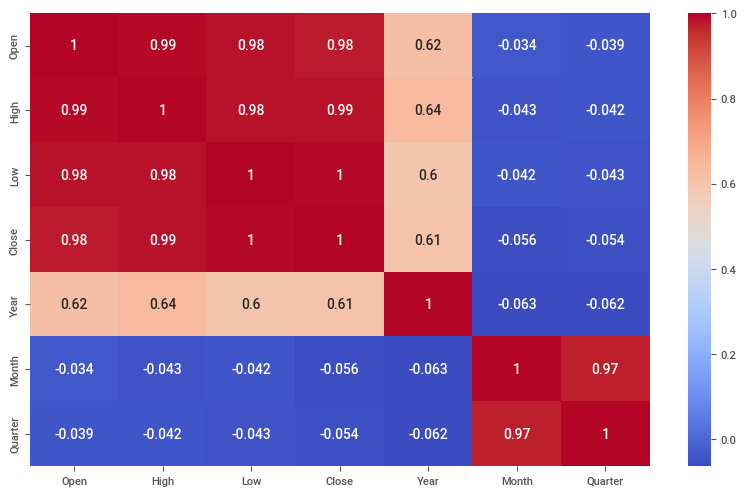

In [53]:
# correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [54]:
# Encode your categorical columns

# get dummies variable for month feature
df = pd.get_dummies(df,columns = ['Month'], prefix='month')

#### What all categorical encoding techniques have you used & why did you use those techniques?

* used pd.get_dummies to create dummy variables for month feature.

### 4. Feature Manipulation & Selection

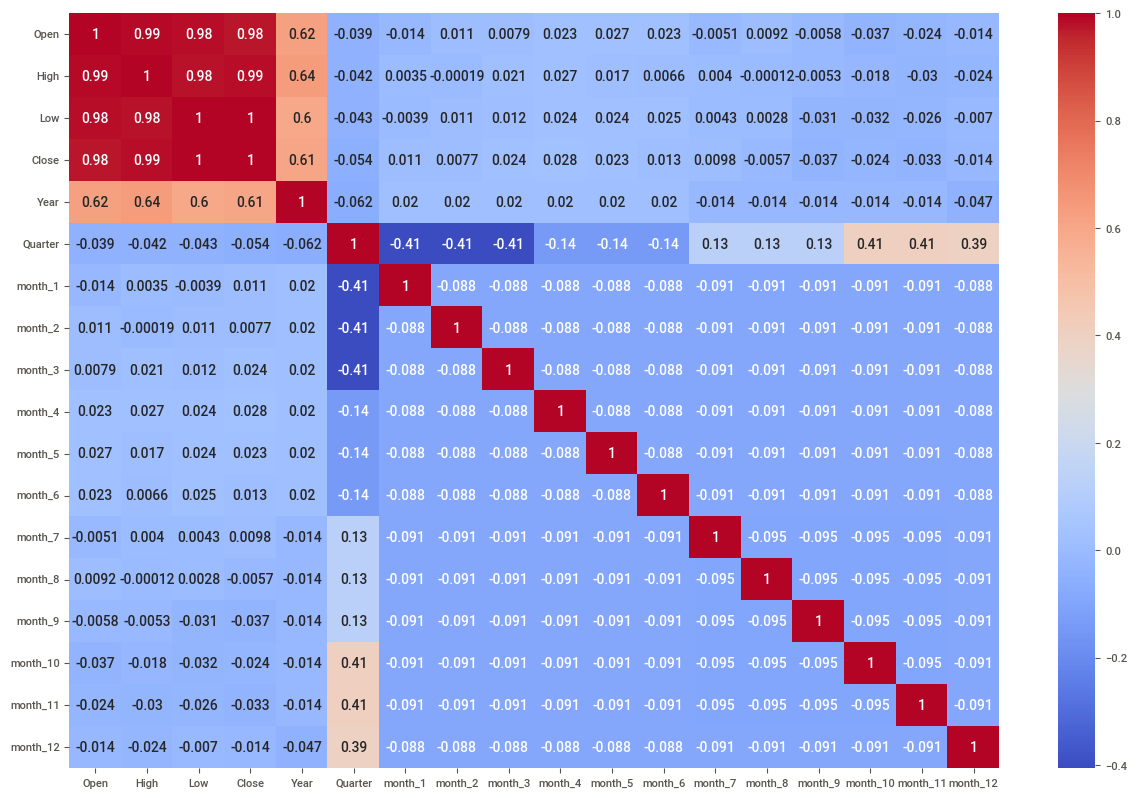

In [55]:
# correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features

# create new feature by taking averege of (open, low, high) as they are highly correalation with each other
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)

df.head()

,Date,Open,High,Low,Close,Year,Quarter,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,2005,3,0,0,0,0,0,0,1,0,0,0,0,0,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,2005,3,0,0,0,0,0,0,0,1,0,0,0,0,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,2005,3,0,0,0,0,0,0,0,0,1,0,0,0,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,2005,4,0,0,0,0,0,0,0,0,0,1,0,0,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,2005,4,0,0,0,0,0,0,0,0,0,0,1,0,13.37


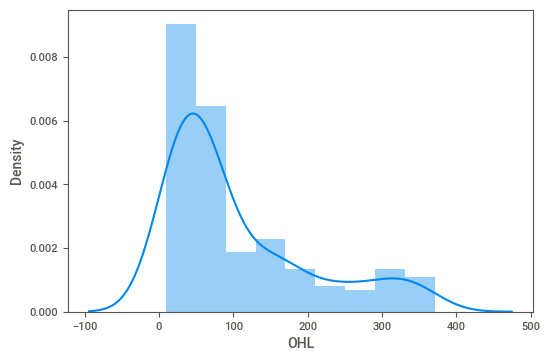

In [57]:
# check 'OHL' distribution
sns.distplot(df['OHL'])

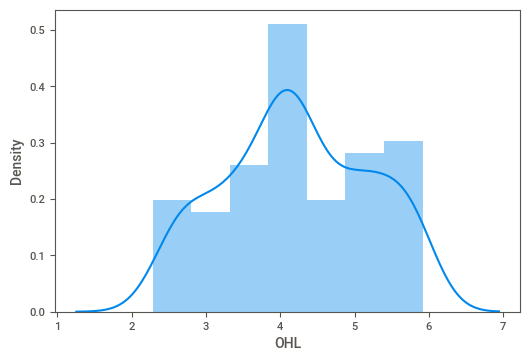

In [58]:
# apply log transform on 'OHL
sns.distplot(np.log(df['OHL']))

Text(0.5, 1.0, 'OHL vs Close')

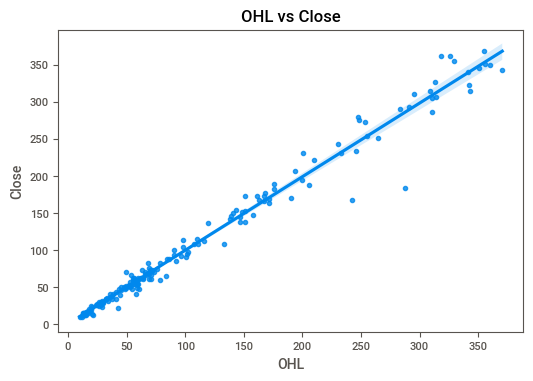

In [59]:
# regplot 'OHL' vs 'close'
sns.regplot(df['OHL'], df['Close'])
plt.title('OHL vs Close')

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

selected_features = [ 'Year','OHL','month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'Close']

selected_df = df[selected_features]       

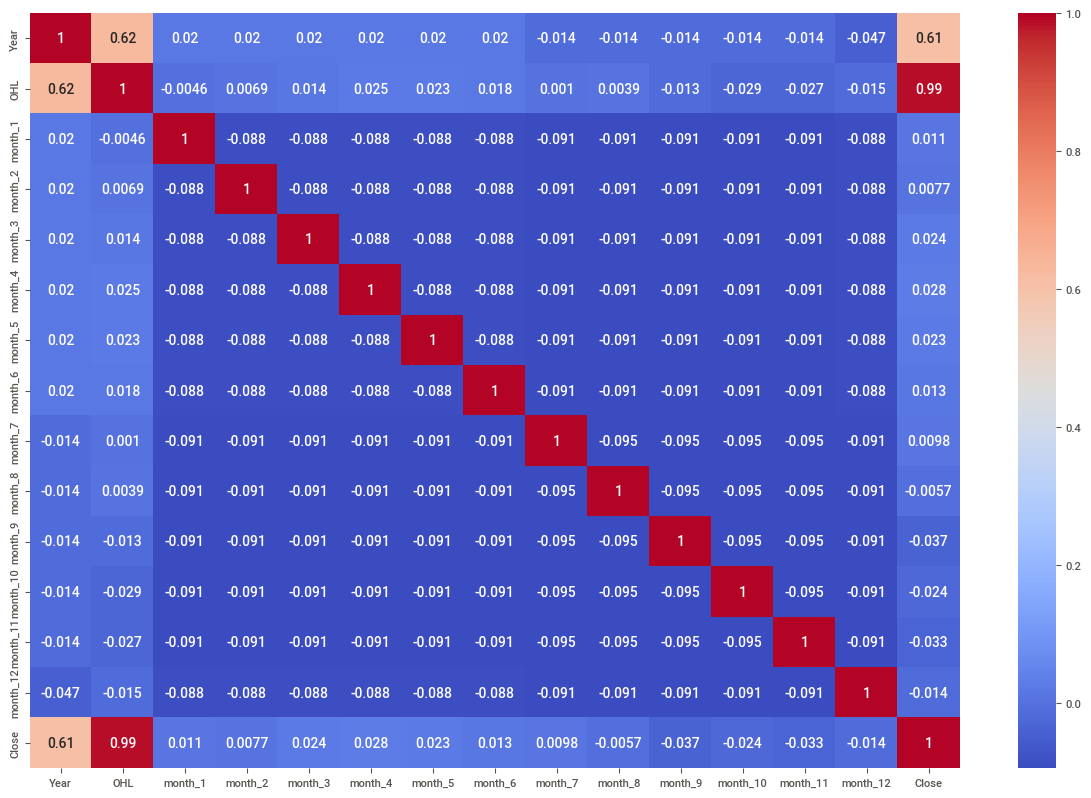

In [61]:
# correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(selected_df.corr(), annot = True, cmap = 'coolwarm')

##### What all feature selection methods have you used  and why?

1. Feature engineering  

* Created a new feature 'OHL' feature from 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother as well as dependent variable 'Close'.
* created dummy variables for 'Month' feature.



2. multicollinearity
* droped 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother.
* droped 'quarter' as it was highly correalated with 'month'.

3. Correaltion
* selected features based on their correlation with dependent variable.




##### Which all features you found important and why?

* 'OHL' which is average of 'Open', 'High' and 'Low'is most important as it is highly correlated with dependent variable.
* 'Year' and 'month' are also important features as it is a timeseries dataset and also has decent correlation with dependent variable. 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [86]:
# creating the set of dependent and independent variables
x = selected_df.drop(labels=['Close'], axis=1)
y = selected_df['Close']

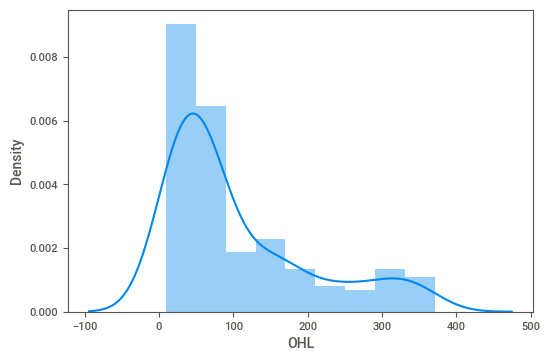

In [63]:
# distribution 'OHL'
sns.distplot(x['OHL'])

Data transformation is need on 'OHL', as you can see in above plot, it is a right skewed distribution. i'm going to use log transform.

In [87]:
# Transform Your data

# log transform
x['OHL'] = np.log(x['OHL'])

### 6. Data Scaling

In [88]:
# Scaling your data
scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

StandardScaler, StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [66]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)


##### What data splitting ratio have you used and why? 

80% for training , 20% for testing



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [68]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [144]:
# create functions for model implementation

# function to plot actual vs prediction
def plot_actual_vs_pred(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  Visualizing Actual VS Prediction
  '''
  # Predict on the model
  y_pred = model.predict(x_test)
  plt.plot(y_pred, label="Prediction", linewidth=1.5)
  plt.plot(y_test.values, label="Actual", linewidth=1.5)
  error = mean_absolute_error(y_test, y_pred)
  plt.title(f"{model_name} - Actual VS Prediction")
  plt.legend(loc="best")
  plt.tight_layout()
  plt.grid(True)
  plt.show()



# 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

# function to calculate cross validation metric score
def cv_metric_score(model, scoring, x_train = x_train, y_train = y_train,):
  '''
  a function to calculate cross validation metric score
  '''
  cv_score = cross_val_score(model, x_train, y_train, scoring=scoring, cv = tscv)
  print(cv_score)
  print(f'The Cross Validation accuracy = {cv_score.mean()}\n')


# function to plot Cross Validation Performance
def plot_cv_perfomance(model, model_name = None, x_train = x_train, y_train = y_train):
  '''  
  Cross Validation Performance Plot
  '''
  skplt.estimators.plot_learning_curve(model, x_train, y_train,
                                      cv=tscv, scoring="r2", shuffle = False,
                                      figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                      title=f"{model_name} - Cross Validation Performance Plot")


# function to plot coeficients
def plot_coef(model,model_name = None):
  features = selected_df.drop('Close', axis = 1).columns
  cofficients = model.coef_
  plt.bar(features,cofficients)
  plt.xticks(fontsize = 12, rotation=90)
  plt.title(f'{model_name} - Coeficients')
  plt.grid(True, axis='y')
  plt.hlines(y=0, xmin=0, xmax=len(cofficients), linestyles='dashed')
  plt.show


# function to check homoscedasticity
def check_homoscedasticity(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  function to check homoscedasticity
  '''
  y_pred = model.predict(x_test)
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals)
  plt.title(f'{model_name} - Variance of residuals')
  plt.xlabel('Predicted value')
  plt.ylabel('residuals')
  plt.show()



 # selected features
features = selected_df.drop('Close', axis = 1).columns
# create dataframe for evaluation metrics
e_metrics_df = pd.DataFrame({'metrics' : ['R2_score', 'adjusted_r2', 'MSE', 'RMSE', 'MAPE', 'MAE']}) 

# funtion to update e_metrics_df
def update_e_metrics_df(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  funtion to update e_metrics_df dataFrame
  '''
  # Predict on the model
  y_pred = model.predict(x_test)

  # Evaluation metric scores
  R2_score = round(r2_score(y_test, y_pred), 3)
  n = y_test.size
  p = features.size
  adjusted_r2 = round(1-(1-R2_score)*(n-1)/(n-p-1),3)
  MSE = round(mean_squared_error(y_test, y_pred), 3)
  RMSE = round(np.sqrt(MSE), 3)
  MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 3)
  MAE =  round(mean_absolute_error(y_test, y_pred), 3)

  # update e_metrics datframe
  e_metrics_df[model_name] = [R2_score, adjusted_r2, MSE, RMSE, MAPE, MAE]
  return e_metrics_df


### ML Model - Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

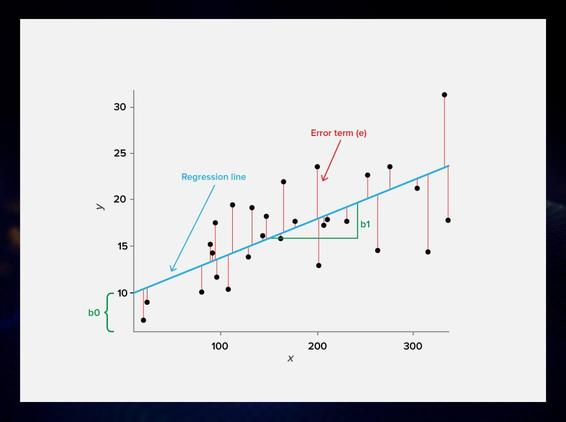

In [141]:
# ML Model - 1 Implementation

lr = LinearRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)

print(f'Training accuracy : {lr.score(x_train,y_train)}')
print(f'Testing accuracy : {lr.score(x_test,y_test)}')

Training accuracy : 0.8207011932533786
Testing accuracy : 0.7665131168181648


----observation----
* Training accuaracy is higher than testing accuracy.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [145]:
# evaluation metrics - LinearRegression
update_e_metrics_df(model = lr, model_name = 'LinearRegression' )

,metrics,LinearRegression
0,R2_score,0.767
1,adjusted_r2,0.619
2,MSE,2161.936
3,RMSE,46.497
4,MAPE,0.950
5,MAE,39.960


----observation----
* adjusted-R2 is lower than R2-score which indicates that the additional input variables are not adding value to the model.
* RMSE and MAE is relatively high.   

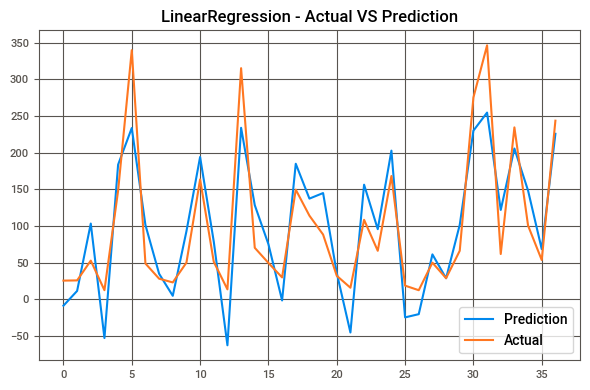

In [146]:
# Visualizing Actual VS Prediction
plot_actual_vs_pred(model = lr, model_name = 'LinearRegression')

----observation----
* some predicted values are going negative which should not be the case as price cannot be negative.
* At some points difference between actual and prediction is very high.

[0.61679735 0.67647779 0.76624962 0.62648259 0.73224223]
mean of cross validation r2 scores = 0.6836499138815821



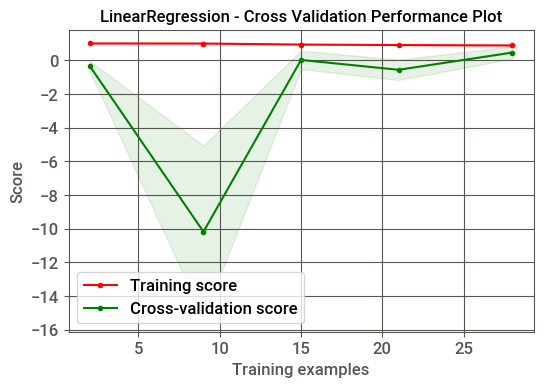

In [147]:
#  Linear Regression cross validation r2-score and Cross Validation Performance Plot
cv_metric_score(lr,scoring = 'r2')
plot_cv_perfomance(model = lr, model_name = 'LinearRegression')

----observation----
* cross validation accuracy is lower than training and testing accuracy.

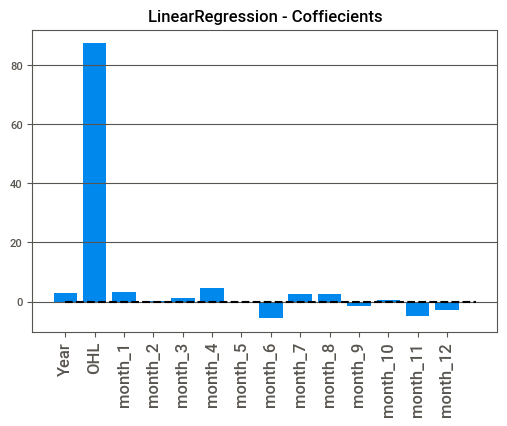

In [148]:
# visualizing cofficients LinearRegression
plot_coef(model = lr, model_name = 'LinearRegression')

----observation----
* 'OHL' variable has highest coeficient value, it is contributing more to the model.
* other variables are not adding much value to the model.  

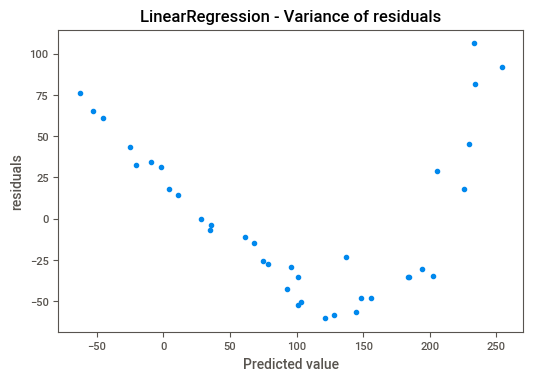

In [149]:
# Check for homoscedasticity
check_homoscedasticity(model = lr, model_name = 'LinearRegression')

----observation----
* 

#### Ridge Implementation

In [108]:
# Ridge Implementation

ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training accuracy : {ridge.score(x_train,y_train)}')
print(f'Testing accuracy : {ridge.score(x_test,y_test)}')

Training accuracy : 0.8206438160526841
Testing accuracy : 0.7673381208516736


----observation----
* No change in training and testing accuracy here.

#### Cross- Validation & Hyperparameter Tuning Ridge

In [115]:
# ridge Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': np.arange(-100,100,0.1)}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
ridge_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)


The best fit alpha value is found out to be : {'alpha': 3.6999999999941053}


In [151]:
# Implementing ridge again with best alpha value which is found by the GridSearch CV
ridge = Ridge( 3.6999999999941053)

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training accuracy : {ridge.score(x_train,y_train)}')
print(f'Testing accuracy : {ridge.score(x_test,y_test)}')

Training accuracy : 0.819977261912733
Testing accuracy : 0.7689980976787718


-----observation----
* Testing accuracy is improved a very little after implementing ridge with GridSearchCV parameter tunning.

In [152]:
# evaluation metrics - Ridge Model
update_e_metrics_df(model = ridge, model_name = 'Ridge' )

,metrics,LinearRegression,Ridge
0,R2_score,0.767,0.769
1,adjusted_r2,0.619,0.622
2,MSE,2161.936,2138.927
3,RMSE,46.497,46.249
4,MAPE,0.950,0.910
5,MAE,39.960,39.450


----observation----
* No major changes in metrics chart here.

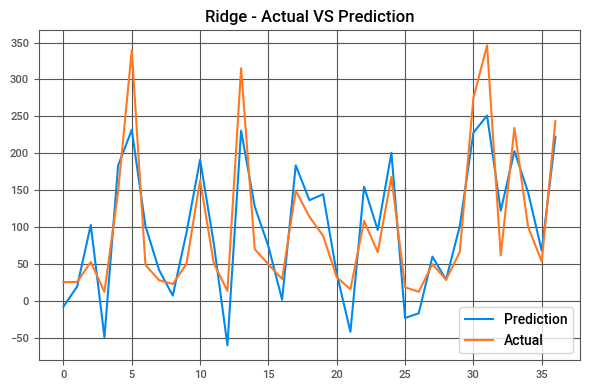

In [153]:
# Visualizing Actual VS Prediction
plot_actual_vs_pred(model = ridge, model_name = 'Ridge')

[0.61652506 0.71866258 0.76264827 0.64520758 0.71130148]
mean of cross validation r2 scores = 0.6908689948266566



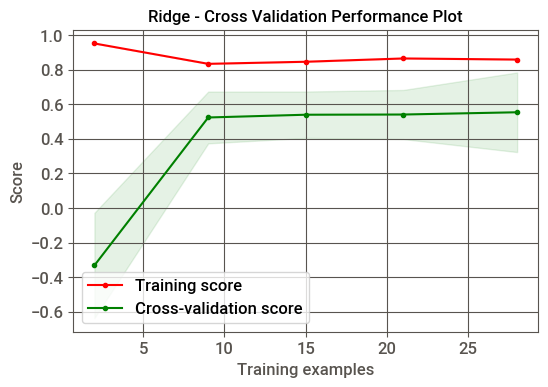

In [154]:
#  Cross Validation r2-score and Performance Plot
cv_metric_score(ridge,scoring = 'r2')
plot_cv_perfomance(model = ridge, model_name = 'Ridge')

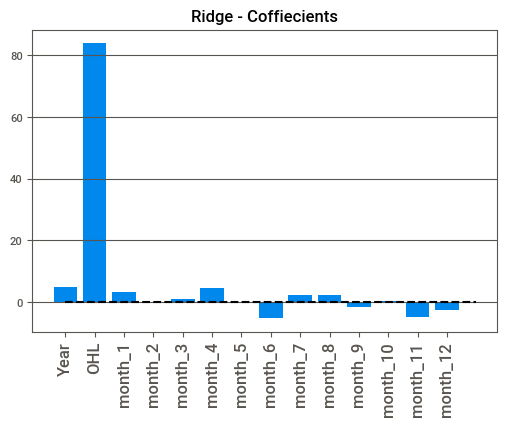

In [155]:
# visualizing cofficients
plot_coef(model = ridge, model_name = 'Ridge')

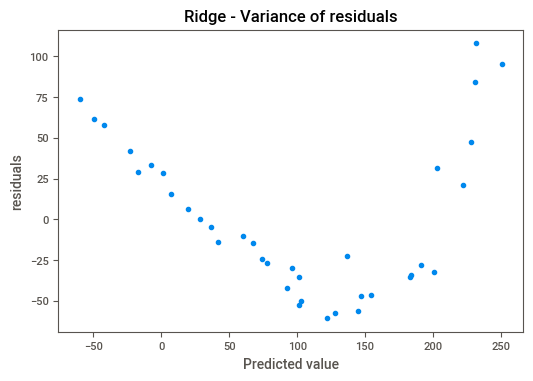

In [156]:
# Check for homoscedasticity
check_homoscedasticity(model = ridge, model_name = 'Ridge')

In [158]:
# evaluation metrics
e_metrics_df

,metrics,LinearRegression,Ridge
0,R2_score,0.767,0.769
1,adjusted_r2,0.619,0.622
2,MSE,2161.936,2138.927
3,RMSE,46.497,46.249
4,MAPE,0.950,0.910
5,MAE,39.960,39.450


### Lasso Implimentation

In [160]:
# Lasso Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training accuracy : {lasso.score(x_train,y_train)}')
print(f'Testing accuracy : {lasso.score(x_test,y_test)}')

Training accuracy : 0.8196084993060795
Testing accuracy : 0.7885842106990102


#### Cross- Validation & Hyperparameter Tuning Ridge

In [161]:
# Lasso Implementation with GridSearch CV hyperparameter optimization technique
parameters = {'alpha': np.arange(-100,100,0.1)}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)


The best fit alpha value is found out to be : {'alpha': 6.199999999993963}


In [162]:
# Implementing lasso again with best alpha value which is found by the GridSearch CV
lasso = Lasso(6.199999999993963)

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training accuracy : {lasso.score(x_train,y_train)}')
print(f'Testing accuracy : {lasso.score(x_test,y_test)}')

Training accuracy : 0.8053491822674721
Testing accuracy : 0.8317737672682028


-----observation----
* Testing accuracy is improved a very little after implementing ridge with GridSearchCV parameter tunning.

In [163]:
# evaluation metrics - Lasso Model
update_e_metrics_df(model = lasso, model_name = 'Lasso' )

,metrics,LinearRegression,Ridge,Lasso
0,R2_score,0.767,0.769,0.832
1,adjusted_r2,0.619,0.622,0.725
2,MSE,2161.936,2138.927,1557.665
3,RMSE,46.497,46.249,39.467
4,MAPE,0.950,0.910,0.651
5,MAE,39.960,39.450,32.197


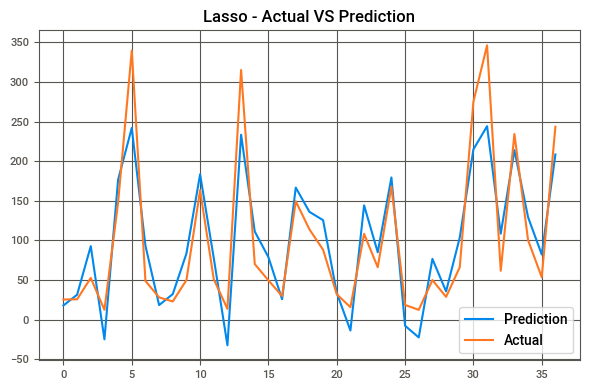

In [164]:
# Visualizing Actual VS Prediction - Lasso
plot_actual_vs_pred(model = lasso, model_name = 'Lasso')

[0.78243434 0.7852348  0.74945397 0.77127771 0.68246267]
mean of cross validation r2 scores = 0.7541726972018545



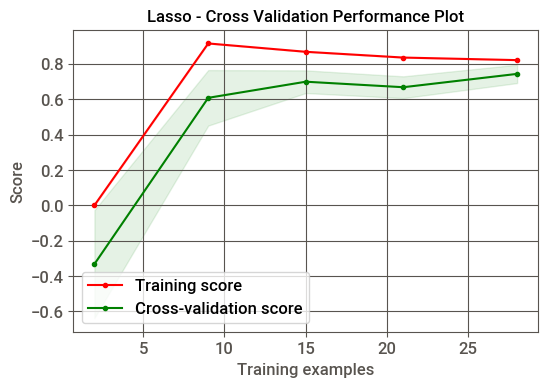

In [165]:
#  Cross Validation r2-score and Performance Plot
cv_metric_score(lasso,scoring = 'r2')
plot_cv_perfomance(model = lasso, model_name = 'Lasso')

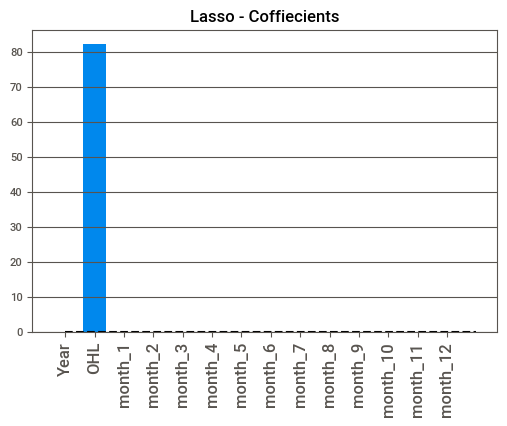

In [166]:
# visualizing cofficients
plot_coef(model = lasso, model_name = 'Lasso')

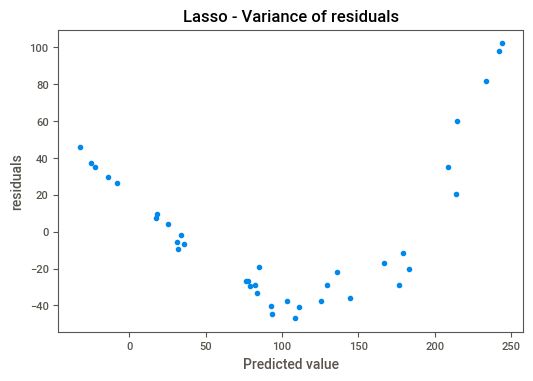

In [167]:
# Check for homoscedasticity
check_homoscedasticity(model = lasso, model_name = 'Lasso')

In [168]:
# evaluation metrics
e_metrics_df

,metrics,LinearRegression,Ridge,Lasso
0,R2_score,0.767,0.769,0.832
1,adjusted_r2,0.619,0.622,0.725
2,MSE,2161.936,2138.927,1557.665
3,RMSE,46.497,46.249,39.467
4,MAPE,0.950,0.910,0.651
5,MAE,39.960,39.450,32.197


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

In [ ]:
# try polynomial fit
# pipe = Pipeline((
# ("poly",PolynomialFeatures(degree=2)),
# ("lr", LinearRegression()),
# ))
# pipe.fit(x_train,y_train)
# print("Training R2")
# print(pipe.score(x_train,y_train))
# print("Testing R2")
# print(pipe.score(x_test,y_test))

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***